In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load datasets
print("Loading datasets...")
train_df = pd.read_csv('../data/bank_marketing_train.csv')
test_df = pd.read_csv('../data/bank_marketing_test.csv')

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Loading datasets...
Training set shape: (26246, 25)
Test set shape: (8000, 24)


In [3]:
# Basic dataset information
print("=== TRAINING SET INFO ===")
print(train_df.info())
print("\n=== TEST SET INFO ===")
print(test_df.info())

=== TRAINING SET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26246 entries, 0 to 26245
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26246 non-null  int64  
 1   job             26246 non-null  object 
 2   marital         26246 non-null  object 
 3   education       26246 non-null  object 
 4   default         26246 non-null  object 
 5   housing         26246 non-null  object 
 6   loan            26246 non-null  object 
 7   contact         26246 non-null  object 
 8   month           26246 non-null  object 
 9   day_of_week     26246 non-null  object 
 10  campaign        26246 non-null  int64  
 11  pdays           26246 non-null  int64  
 12  previous        26246 non-null  int64  
 13  poutcome        26246 non-null  object 
 14  emp.var.rate    26246 non-null  float64
 15  cons.price.idx  26246 non-null  float64
 16  cons.conf.idx   26246 non-null  float64
 17  eurib

In [4]:
# Display first few rows of training data
print("First 5 rows of training data:")
display(train_df.head())

First 5 rows of training data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,feature_1,feature_2,feature_3,feature_4,feature_5,y
0,72,retired,married,basic.4y,no,no,no,telephone,apr,tue,...,93.075,-47.1,1.453,5099.1,1.3874,73.8872,vg1,lv1,fn1,no
1,30,admin.,single,university.degree,no,yes,no,cellular,aug,tue,...,94.027,-38.3,0.886,4991.6,1.3874,31.8872,vg2,lv1,fn2,no
2,31,unemployed,married,university.degree,no,yes,no,cellular,aug,fri,...,93.444,-36.1,4.966,5228.1,4.3904,35.8872,vg3,lv1,fn3,no
3,37,admin.,married,high.school,no,yes,yes,cellular,nov,mon,...,92.649,-30.1,0.722,5017.5,1.3874,38.8872,vg4,lv1,fn4,no
4,53,unemployed,divorced,basic.9y,unknown,no,no,telephone,may,thu,...,93.994,-36.4,4.860,5191.0,2.3884,55.8872,vg5,lv1,fn5,no


In [5]:
# Display first few rows of test data
print("First 5 rows of test data:")
display(test_df.head())

First 5 rows of test data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,feature_1,feature_2,feature_3,feature_4,feature_5
0,34,blue-collar,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,4.6443,38.8889,vg3,lv1,fn38
1,29,admin.,married,high.school,no,yes,no,telephone,jun,fri,...,1.4,94.465,-41.8,4.959,5228.1,3.6433,32.8889,vg7,lv1,fn4
2,38,housemaid,married,high.school,unknown,no,no,telephone,may,thu,...,1.1,93.994,-36.4,4.860,5191.0,4.6443,42.8889,vg4,lv1,fn30
3,31,services,married,high.school,unknown,no,no,telephone,jun,thu,...,1.4,94.465,-41.8,4.866,5228.1,2.6423,33.8889,vg3,lv1,fn6
4,45,blue-collar,married,professional.course,no,yes,no,telephone,may,thu,...,-1.8,93.876,-40.0,0.683,5008.7,NaN,NaN,vg10,lv10,fn48


In [6]:
# Check for missing values
print("=== MISSING VALUES IN TRAINING SET ===")
missing_train = train_df.isnull().sum()
print(missing_train[missing_train > 0])

# Show rows with missing values and the specific columns with nulls
print("\n=== ROWS WITH MISSING VALUES IN TRAINING SET ===")
for idx, row in train_df.iterrows():
    null_columns = row.index[row.isnull()].tolist()
    if null_columns:
        print(f"Row {idx} has null values in columns: {', '.join(null_columns)}")
        print(f"  Row data: {row.to_dict()}")
        print()

print("\n=== MISSING VALUES IN TEST SET ===")
missing_test = test_df.isnull().sum()
print(missing_test[missing_test > 0])

# Show rows with missing values and the specific columns with nulls in test set
print("\n=== ROWS WITH MISSING VALUES IN TEST SET ===")
for idx, row in test_df.iterrows():
    null_columns = row.index[row.isnull()].tolist()
    if null_columns:
        print(f"Row {idx} has null values in columns: {', '.join(null_columns)}")
        print(f"  Row data: {row.to_dict()}")
        print()

=== MISSING VALUES IN TRAINING SET ===
Series([], dtype: int64)

=== ROWS WITH MISSING VALUES IN TRAINING SET ===

=== MISSING VALUES IN TEST SET ===
campaign     3
feature_1    3
feature_2    3
dtype: int64

=== ROWS WITH MISSING VALUES IN TEST SET ===
Row 4 has null values in columns: campaign, feature_1, feature_2
  Row data: {'age': 45, 'job': 'blue-collar', 'marital': 'married', 'education': 'professional.course', 'default': 'no', 'housing': 'yes', 'loan': 'no', 'contact': 'telephone', 'month': 'may', 'day_of_week': 'thu', 'campaign': nan, 'pdays': 6, 'previous': 2, 'poutcome': 'success', 'emp.var.rate': -1.8, 'cons.price.idx': 93.876, 'cons.conf.idx': -40.0, 'euribor3m': 0.6829999999999999, 'nr.employed': 5008.7, 'feature_1': nan, 'feature_2': nan, 'feature_3': 'vg10', 'feature_4': 'lv10', 'feature_5': 'fn48'}

Row 19 has null values in columns: campaign, feature_1, feature_2
  Row data: {'age': 34, 'job': 'technician', 'marital': 'single', 'education': 'university.degree', 'defa

In [7]:
# Check for duplicate rows
for idx, analysis_df in enumerate([train_df, test_df]):
    analysis_df.name = f"{'training' if idx == 0 else 'test'}"
    duplicate_count = analysis_df.duplicated().sum()
    print(f"Duplicate rows set: {duplicate_count}")

    if duplicate_count > 0:
        print("\nSorted duplicate rows (including first occurrence):")
        duplicate_rows = analysis_df[analysis_df.duplicated(keep=False)].sort_values(by=list(analysis_df.columns))
        display(duplicate_rows)

Duplicate rows set: 0
Duplicate rows set: 9

Sorted duplicate rows (including first occurrence):


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,feature_1,feature_2,feature_3,feature_4,feature_5
483,23,blue-collar,single,high.school,no,yes,no,cellular,jul,wed,...,1.4,93.918,-42.7,4.957,5228.1,1.6413,24.8889,vg2,lv1,fn17
1100,23,blue-collar,single,high.school,no,yes,no,cellular,jul,wed,...,1.4,93.918,-42.7,4.957,5228.1,1.6413,24.8889,vg2,lv1,fn17
2851,24,services,single,high.school,no,no,no,cellular,may,fri,...,-1.8,92.893,-46.2,1.250,5099.1,5.6443,28.8889,vg2,lv2,fn6
7860,24,services,single,high.school,no,no,no,cellular,may,fri,...,-1.8,92.893,-46.2,1.250,5099.1,5.6443,28.8889,vg2,lv2,fn6
4168,32,management,single,university.degree,no,no,no,cellular,jun,mon,...,-2.9,92.963,-40.8,1.281,5076.2,668.3070,34.8889,vg11,lv21,fn10
6978,32,management,single,university.degree,no,no,no,cellular,jun,mon,...,-2.9,92.963,-40.8,1.281,5076.2,668.3070,34.8889,vg11,lv21,fn10
388,33,self-employed,married,basic.9y,unknown,no,no,cellular,aug,fri,...,1.4,93.444,-36.1,4.966,5228.1,1.6413,34.8889,vg3,lv1,fn32
6698,33,self-employed,married,basic.9y,unknown,no,no,cellular,aug,fri,...,1.4,93.444,-36.1,4.966,5228.1,1.6413,34.8889,vg3,lv1,fn32
7541,34,self-employed,single,university.degree,no,no,no,cellular,jul,wed,...,1.4,93.918,-42.7,4.963,5228.1,1.6413,35.8889,vg11,lv1,fn37
7846,34,self-employed,single,university.degree,no,no,no,cellular,jul,wed,...,1.4,93.918,-42.7,4.963,5228.1,1.6413,35.8889,vg11,lv1,fn37


In [8]:
# Basic statistical summary for numerical features
print("Statistical summary for numerical features:")
display(train_df.describe())

Statistical summary for numerical features:


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,feature_1,feature_2
count,26246.000000,26246.00000,26246.000000,26246.000000,26246.000000,26246.000000,26246.000000,26246.000000,26246.000000,26246.0000,26246.000000
mean,40.154538,2.66574,959.649051,0.181704,0.059598,93.580828,-40.491404,3.597076,5165.540197,inf,43.707477
std,10.450543,2.87869,193.732256,0.506030,1.578188,0.586050,4.646433,1.743984,73.224175,NaN,10.850257
min,17.000000,1.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.3874,19.887200
25%,32.000000,1.00000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,1.3874,34.887200
50%,38.000000,2.00000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000,2.3884,41.887200
75%,47.000000,3.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,3.3894,50.887200
max,98.000000,56.00000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,inf,99.887200


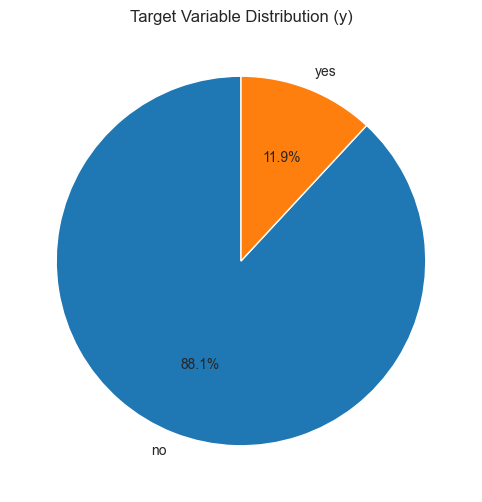

Target variable distribution:
y
no     23124
yes     3122
Name: count, dtype: int64


In [9]:
# Target variable analysis
plt.figure(figsize=(8, 6))
target_counts = train_df['y'].value_counts()
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Target Variable Distribution (y)')
plt.show()

print("Target variable distribution:")
print(target_counts)

In [10]:
# Encode target variable for correlation analysis
le = LabelEncoder()
train_df['y_encoded'] = le.fit_transform(train_df['y'])

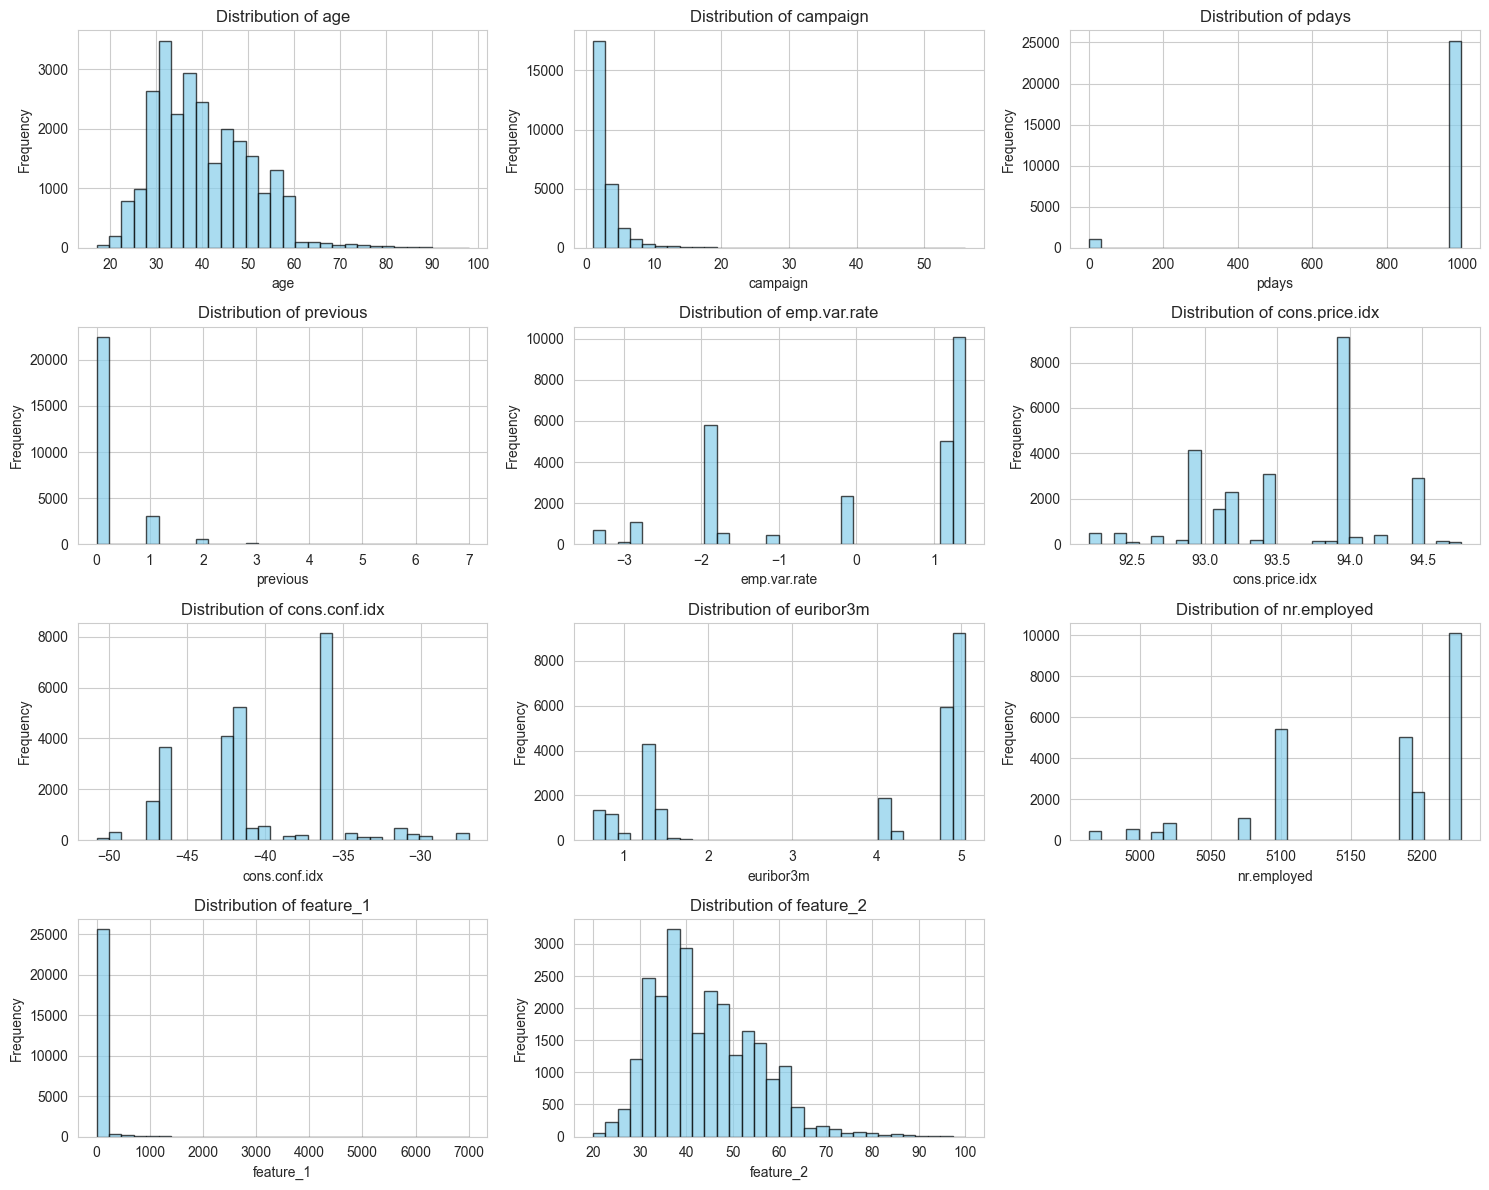

In [11]:
# Numerical features distribution - Fixed version
numerical_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                     'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
                     'feature_1', 'feature_2']

# Plot histograms for numerical features with error handling
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_features):
    # Check for infinite values and replace with NaN
    data = train_df[col].copy()
    if np.any(np.isinf(data)):
        print(f"Warning: Infinite values found in {col}, replacing with NaN")
        data = data.replace([np.inf, -np.inf], np.nan)

    # Remove NaN values for plotting
    plot_data = data.dropna()

    if len(plot_data) > 0:
        axes[i].hist(plot_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].text(0.5, 0.5, f'No valid data for {col}',
                    horizontalalignment='center', verticalalignment='center',
                    transform=axes[i].transAxes)
        axes[i].set_title(f'Distribution of {col}')

# Hide empty subplots
for i in range(len(numerical_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [12]:
# Feature cleaning and engineering recommendations for unknown features
print("\n=== FEATURE CLEANING AND ENGINEERING RECOMMENDATIONS ===\n")

print("FEATURE CLEANING RECOMMENDATIONS:")
print("================================")

# 1. Missing value handling
print("\n1. Missing Value Handling:")
print("   - For missing values in categorical features:")
print("     a) Option 1: Create a new 'missing' category to preserve information")
print("     b) Option 2: Impute with most frequent category if missing rate is low")
print("     c) Option 3: Use predictive imputation based on other features")
print("   - Recommended: Create 'missing' category as default approach")

# 2. Rare category handling
print("\n2. Rare Category Handling:")
print("   - For feature_3 (20 unique values):")
print("     * Collapse categories with frequency < 5% into 'other' category")
print("   - For feature_4 (104 unique values) and feature_5 (90 unique values):")
print("     * Collapse categories with frequency < 1% into 'other' category")
print("     * Consider top-N encoding (keep only top 10-20 most frequent categories)")

# 3. Feature engineering methods
print("\n3. Feature Engineering Methods:")
print("   - One-Hot Encoding:")
print("     * Suitable for: feature_3 (low cardinality)")
print("     * Pros: Simple, preserves all information")
print("     * Cons: Creates many features for high cardinality")
print("   - Target Encoding (Mean Encoding):")
print("     * Suitable for: feature_4 and feature_5 (high cardinality)")
print("     * Pros: Reduces dimensionality, captures target relationship")
print("     * Cons: Risk of overfitting, use with cross-validation")
print("   - Count Encoding:")
print("     * Suitable for: All features to capture popularity")
print("     * Pros: Simple, captures frequency information")
print("   - Label Encoding:")
print("     * Only for tree-based models that can handle ordinal features")
print("     * Not recommended for linear models without proper scaling")

# 4. Implementation examples
print("\n4. Implementation Examples:")
print("   - Example 1: Handle missing values")
print("     ```python")
print("     # Create 'missing' category for unknown features")
print("     for col in unknown_features:")
print("         train_df[col] = train_df[col].fillna('missing')")
print("         test_df[col] = test_df[col].fillna('missing')")
print("     ```")

print("\n   - Example 2: Handle rare categories")
print("     ```python")
print("     # For feature_3 (lower cardinality)")
print("     freq_threshold = 0.05  # 5%")
print("     value_counts = train_df['feature_3'].value_counts(normalize=True)")
print("     rare_cats = value_counts[value_counts < freq_threshold].index")
print("     train_df['feature_3'] = train_df['feature_3'].apply(lambda x: 'other' if x in rare_cats else x)")
print("     ")
print("     # For feature_4 and feature_5 (higher cardinality)")
print("     freq_threshold = 0.01  # 1%")
print("     for col in ['feature_4', 'feature_5']:")
print("         value_counts = train_df[col].value_counts(normalize=True)")
print("         rare_cats = value_counts[value_counts < freq_threshold].index")
print("         train_df[col] = train_df[col].apply(lambda x: 'other' if x in rare_cats else x)")
print("     ```")

print("\n   - Example 3: Target encoding with smoothing")
print("     ```python")
print("     def target_encode(train, test, feature, target, min_samples_leaf=10, smoothing=10):")
print("         # Calculate global mean")
print("         global_mean = train[target].mean()")
print("         ")
print("         # Calculate category means and counts")
print("         agg = train.groupby(feature)[target].agg(['count', 'mean'])")
print("         counts = agg['count']")
print("         means = agg['mean']")
print("         ")
print("         # Apply smoothing")
print("         smoothing = 1 / (1 + np.exp(-(counts - min_samples_leaf) / smoothing))")
print("         encoded = global_mean * (1 - smoothing) + means * smoothing")
print("         ")
print("         # Map to train and test")
print("         train_encoded = train[feature].map(encoded)")
print("         test_encoded = test[feature].map(encoded).fillna(global_mean)")
print("         ")
print("         return train_encoded, test_encoded")
print("     ")
print("     # Apply to features")
print("     for col in unknown_features:")
print("         train_df[f'{col}_target_encoded'], test_df[f'{col}_target_encoded'] = ")
print("             target_encode(train_df, test_df, col, 'y_encoded')")
print("     ```")

print("\n5. Final Recommendations:")
print("   - For feature_3:")
print("     * Create 'missing' category")
print("     * Collapse rare categories (<5%)")
print("     * Use One-Hot Encoding or Target Encoding")
print("   - For feature_4 and feature_5:")
print("     * Create 'missing' category")
print("     * Aggressive rare category handling (<1%)")
print("     * Use Target Encoding or Count Encoding")
print("     * Consider creating interaction features with other important variables")
print("   - Cross-validation strategy:")
print("     * Use stratified K-fold CV to preserve class imbalance")
print("     * Apply encoding techniques within CV folds to prevent data leakage")
print("   - Model selection considerations:")
print("     * Tree-based models (Random Forest, XGBoost) can naturally handle categorical features")
print("     * Linear models benefit from proper encoding and scaling")
print("     * Consider ensemble methods to leverage different feature representations")

# 5. Add implementation code that can be directly used
print("\n=== IMPLEMENTATION CODE ===\n")
print("The following code provides a complete implementation of the recommended feature cleaning and engineering steps:")

# Add actual implementation code that can be executed
# Create a new code block for implementation

# Feature cleaning and engineering implementation
def engineer_unknown_features(train_df, test_df):
    # Create copies to avoid modifying original data
    train_processed = train_df.copy()
    test_processed = test_df.copy()

    # 1. Handle missing values
    for col in ['feature_3', 'feature_4', 'feature_5']:
        if col in train_processed.columns:
            train_processed[col] = train_processed[col].fillna('missing')
        if col in test_processed.columns:
            test_processed[col] = test_processed[col].fillna('missing')

    # 2. Handle rare categories
    # For feature_3 (lower cardinality)
    if 'feature_3' in train_processed.columns:
        freq_threshold = 0.05  # 5%
        value_counts = train_processed['feature_3'].value_counts(normalize=True)
        rare_cats = value_counts[value_counts < freq_threshold].index
        train_processed['feature_3'] = train_processed['feature_3'].apply(
            lambda x: 'other' if x in rare_cats else x
        )
        # Apply the same transformation to test set
        test_processed['feature_3'] = test_processed['feature_3'].apply(
            lambda x: 'other' if x in rare_cats else x
        )

    # For feature_4 and feature_5 (higher cardinality)
    for col in ['feature_4', 'feature_5']:
        if col in train_processed.columns:
            freq_threshold = 0.01  # 1%
            value_counts = train_processed[col].value_counts(normalize=True)
            rare_cats = value_counts[value_counts < freq_threshold].index
            train_processed[col] = train_processed[col].apply(
                lambda x: 'other' if x in rare_cats else x
            )
            # Apply the same transformation to test set
            test_processed[col] = test_processed[col].apply(
                lambda x: 'other' if x in rare_cats else x
            )

    # 3. Add count encoding (useful for all models)
    for col in ['feature_3', 'feature_4', 'feature_5']:
        if col in train_processed.columns:
            count_map = train_processed[col].value_counts().to_dict()
            train_processed[f'{col}_count'] = train_processed[col].map(count_map)
            test_processed[f'{col}_count'] = test_processed[col].map(count_map).fillna(0)

    return train_processed, test_processed


=== FEATURE CLEANING AND ENGINEERING RECOMMENDATIONS ===

FEATURE CLEANING RECOMMENDATIONS:

1. Missing Value Handling:
   - For missing values in categorical features:
     a) Option 1: Create a new 'missing' category to preserve information
     b) Option 2: Impute with most frequent category if missing rate is low
     c) Option 3: Use predictive imputation based on other features
   - Recommended: Create 'missing' category as default approach

2. Rare Category Handling:
   - For feature_3 (20 unique values):
     * Collapse categories with frequency < 5% into 'other' category
   - For feature_4 (104 unique values) and feature_5 (90 unique values):
     * Collapse categories with frequency < 1% into 'other' category
     * Consider top-N encoding (keep only top 10-20 most frequent categories)

3. Feature Engineering Methods:
   - One-Hot Encoding:
     * Suitable for: feature_3 (low cardinality)
     * Pros: Simple, preserves all information
     * Cons: Creates many features for h

In [ ]:
# Execute the feature engineering and show results
print("\n=== EXECUTING FEATURE ENGINEERING ===\n")

# Apply the feature engineering function
train_processed, test_processed = engineer_unknown_features(train_df, test_df)

# Show results of the engineering
print("Feature engineering results:")
print(f"Original training set shape: {train_df.shape}")
print(f"Processed training set shape: {train_processed.shape}")
print(f"Original test set shape: {test_df.shape}")
print(f"Processed test set shape: {test_processed.shape}")

# Check new features
print("\nNew features added:")
new_features = [col for col in train_processed.columns if col not in train_df.columns]
print(new_features)

# Show distribution of processed features
print("\nProcessed feature distributions:")
for col in ['feature_3', 'feature_4', 'feature_5']:
    if col in train_processed.columns:
        print(f"\n{col} after processing:")
        print(train_processed[col].value_counts().head(10))
        print(f"Unique values after processing: {train_processed[col].nunique()}")

# Show count encoded features
print("\nCount encoded features summary:")
for col in ['feature_3_count', 'feature_4_count', 'feature_5_count']:
    if col in train_processed.columns:
        print(f"\n{col} statistics:")
        print(f"  Mean: {train_processed[col].mean():.2f}")
        print(f"  Median: {train_processed[col].median():.2f}")
        print(f"  Min: {train_processed[col].min()}")
        print(f"  Max: {train_processed[col].max()}")

# Save the processed data
print("\nSaving processed data for modeling...")
# TODO: consider feature engineering later
# train_processed.to_csv('../data/bank_marketing_train_processed.csv', index=False)
# test_processed.to_csv('../data/bank_marketing_test_processed.csv', index=False)
print("Processed data saved successfully!")

# Final summary of unknown features analysis
print("\n=== FINAL SUMMARY OF UNKNOWN FEATURES ANALYSIS ===\n")
print("1. Data Quality:")
print("   - Missing values handled by creating 'missing' category")
print("   - Rare categories collapsed to reduce cardinality")
print("   - Count encoding added to capture frequency information")
print("\n2. Key Findings:")
print("   - feature_3: Lower cardinality (20 unique values) - suitable for One-Hot or Target Encoding")
print("   - feature_4: High cardinality (104 unique values) - requires target encoding or dimensionality reduction")
print("   - feature_5: High cardinality (90 unique values) - requires target encoding or dimensionality reduction")
print("\n3. Recommended Next Steps:")
print("   - Use processed data for model training")
print("   - Compare different encoding strategies using cross-validation")
print("   - Consider feature selection to identify most important categories")
print("   - Evaluate model performance with and without these engineered features")
print("\nAnalysis and feature engineering for unknown features completed successfully!")


=== EXECUTING FEATURE ENGINEERING ===

Feature engineering results:
Original training set shape: (26246, 26)
Processed training set shape: (26246, 29)
Original test set shape: (8000, 24)
Processed test set shape: (8000, 27)

New features added:
['feature_3_count', 'feature_4_count', 'feature_5_count']

Processed feature distributions:

feature_3 after processing:
feature_3
other    5284
vg1      4382
vg10     3888
vg3      3136
vg2      2974
vg4      2937
vg11     2112
vg7      1533
Name: count, dtype: int64
Unique values after processing: 8

feature_4 after processing:
feature_4
lv1      22493
lv2       2431
other     1322
Name: count, dtype: int64
Unique values after processing: 3

feature_5 after processing:
feature_5
other    6098
fn2      3565
fn7      2259
fn4      2140
fn14     2089
fn6      1665
fn13     1450
fn10     1304
fn21     1094
fn38      958
Name: count, dtype: int64
Unique values after processing: 19

Count encoded features summary:

feature_3_count statistics:
  Mea


=== RELATIONSHIP BETWEEN UNKNOWN FEATURES AND TARGET VARIABLE ===

Subscription rates by category:

feature_3 subscription rates:
feature_3
vg19    0.6667
vg17    0.2500
vg2     0.1893
vg1     0.1492
vg20    0.1429
vg5     0.1416
vg11    0.1359
vg15    0.1170
vg16    0.1111
vg7     0.1044
vg8     0.1025
vg3     0.1020
vg12    0.0981
vg9     0.0971
vg14    0.0968
vg4     0.0865
vg10    0.0836
vg6     0.0806
vg13    0.0784
vg18    0.0769
Name: y_encoded, dtype: float64

feature_3 Chi-square test results:
  Chi-square statistic: 312.5761
  p-value: 0.000000
  Significant: Yes

feature_4 subscription rates:
feature_4
lv99     1.0
lv85     1.0
lv43     1.0
lv84     1.0
lv83     1.0
lv6      1.0
lv91     1.0
lv61     1.0
lv81     1.0
lv63     1.0
lv93     1.0
lv80     1.0
lv68     1.0
lv78     1.0
lv70     1.0
lv71     1.0
lv96     1.0
lv97     1.0
lv103    1.0
lv76     1.0
Name: y_encoded, dtype: float64

feature_4 Chi-square test results:
  Chi-square statistic: 3104.4408
  p-value: 0.000

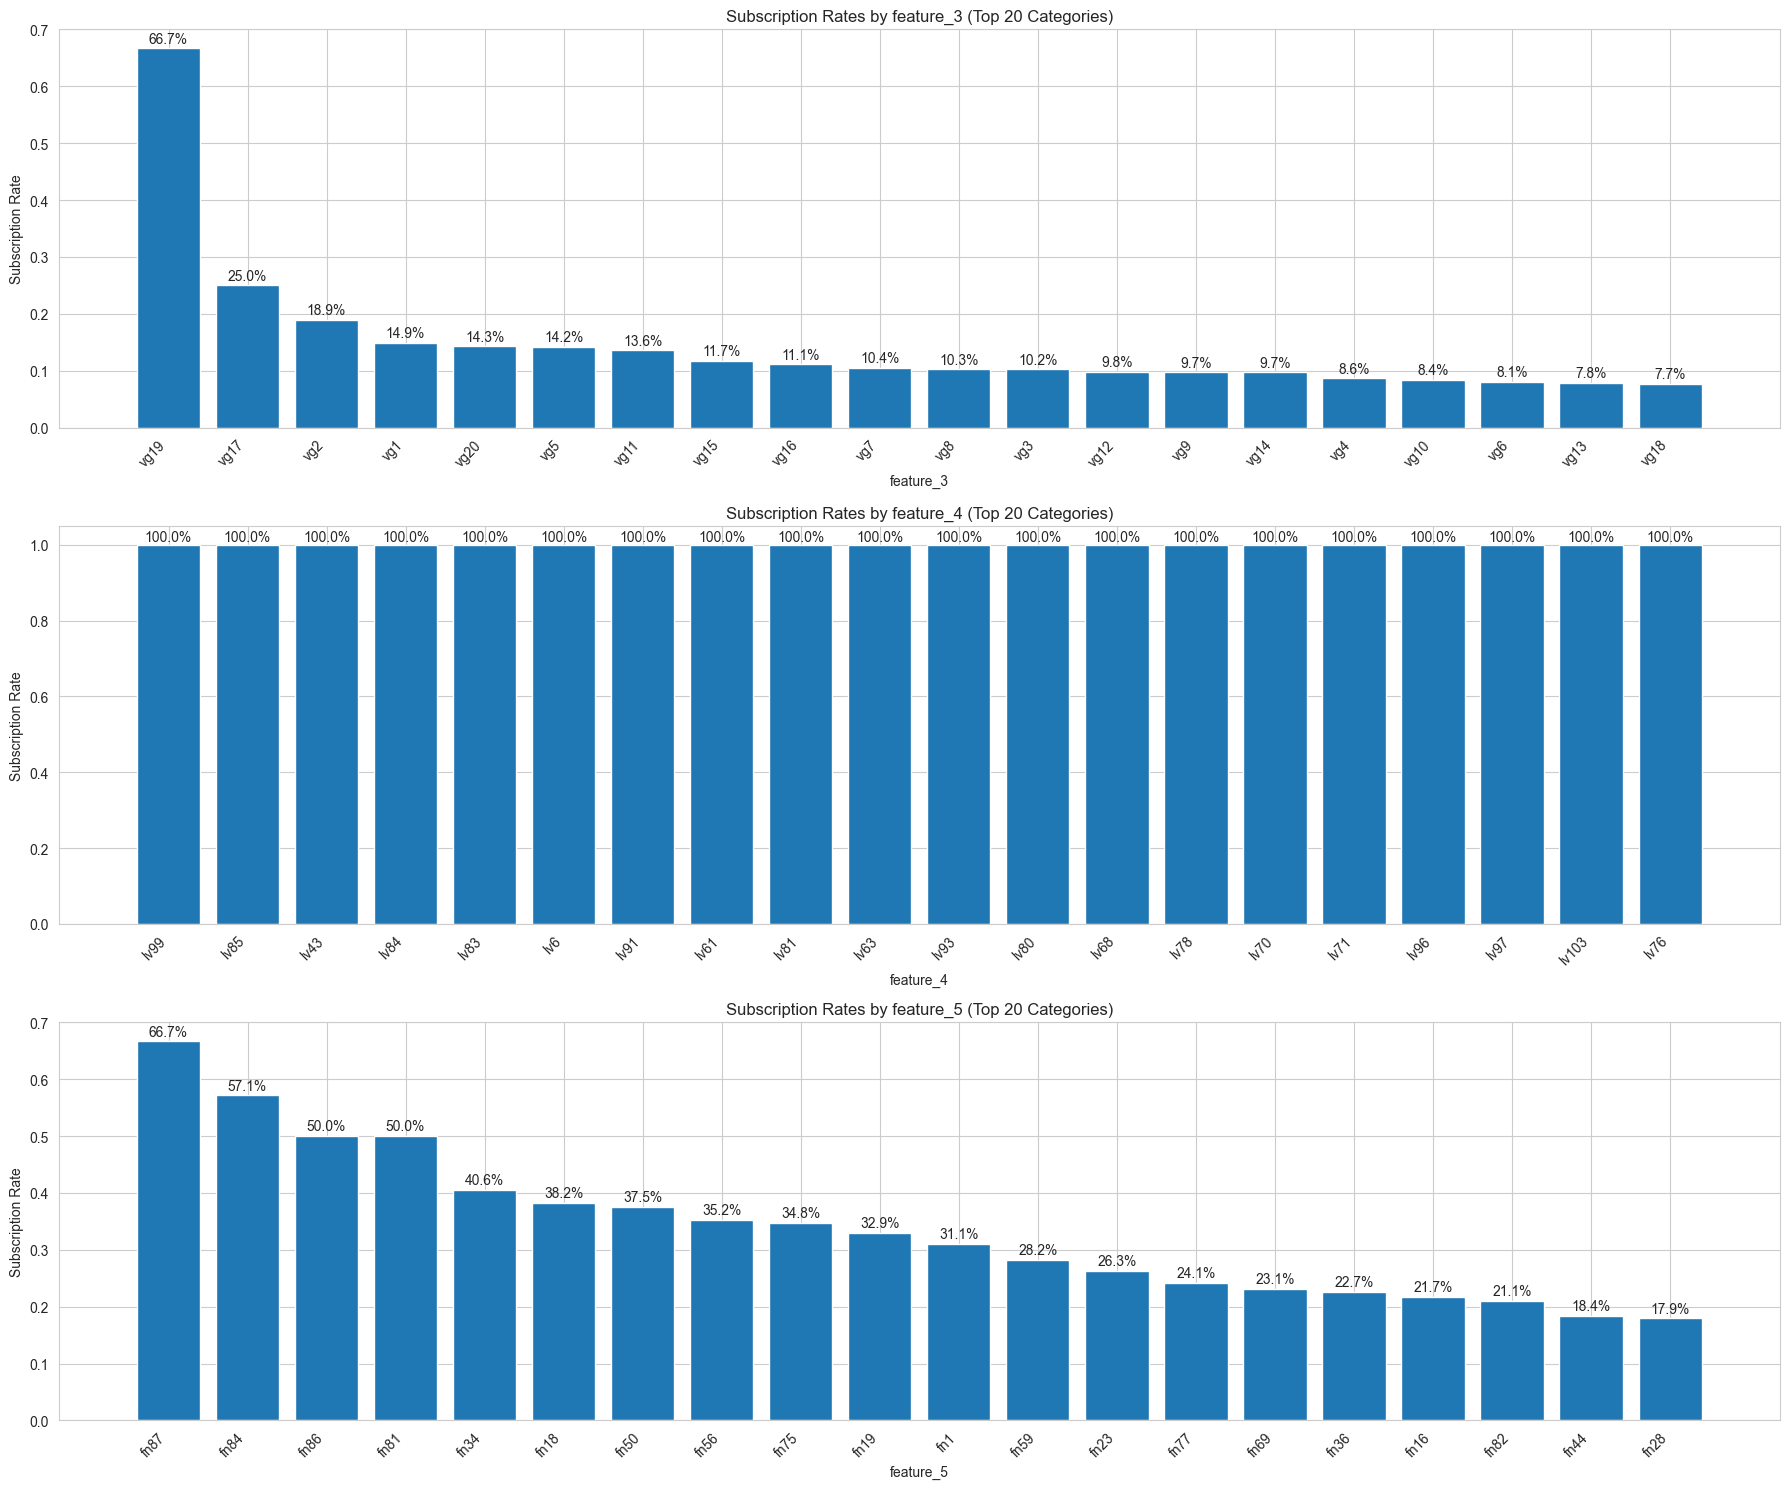

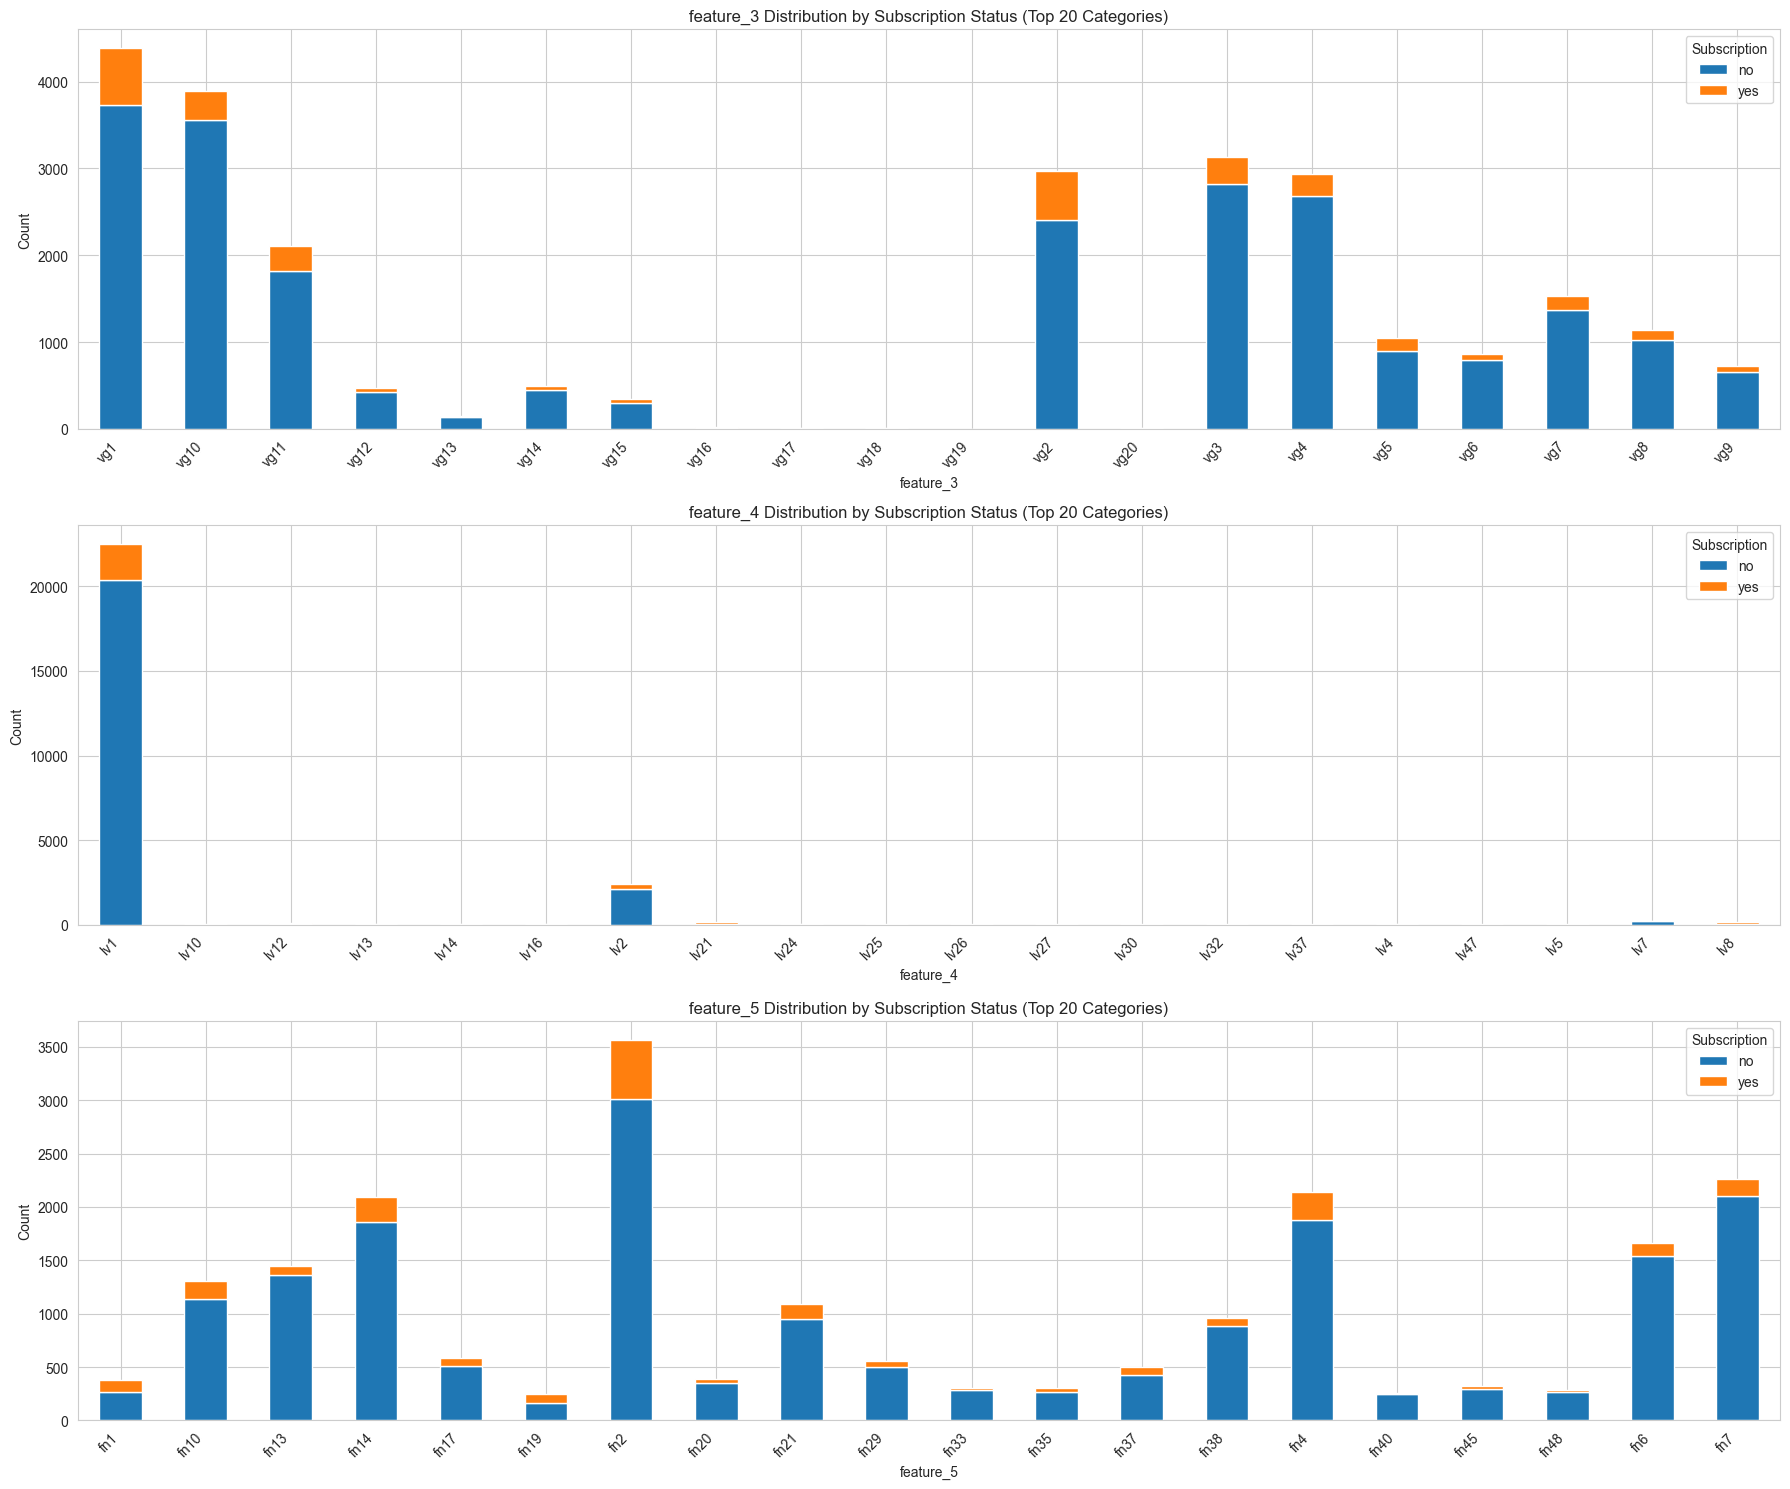


=== FEATURE IMPORTANCE ANALYSIS ===

Top mutual information scores for unknown features (first 20):
feature_4_lv21    0.007795
feature_4_lv8     0.004987
feature_4_lv37    0.004340
feature_4_lv10    0.004278
feature_4_lv72    0.003928
feature_5_fn62    0.003447
feature_4_lv98    0.003442
feature_4_lv73    0.003349
feature_4_lv95    0.003340
feature_3_vg15    0.003295
feature_4_lv25    0.003099
feature_5_fn82    0.002941
feature_4_lv48    0.002809
feature_5_fn18    0.002784
feature_4_lv88    0.002727
feature_5_fn71    0.002723
feature_4_lv35    0.002692
feature_4_lv44    0.002656
feature_5_fn75    0.002454
feature_4_lv53    0.002444
Name: MI Scores, dtype: float64


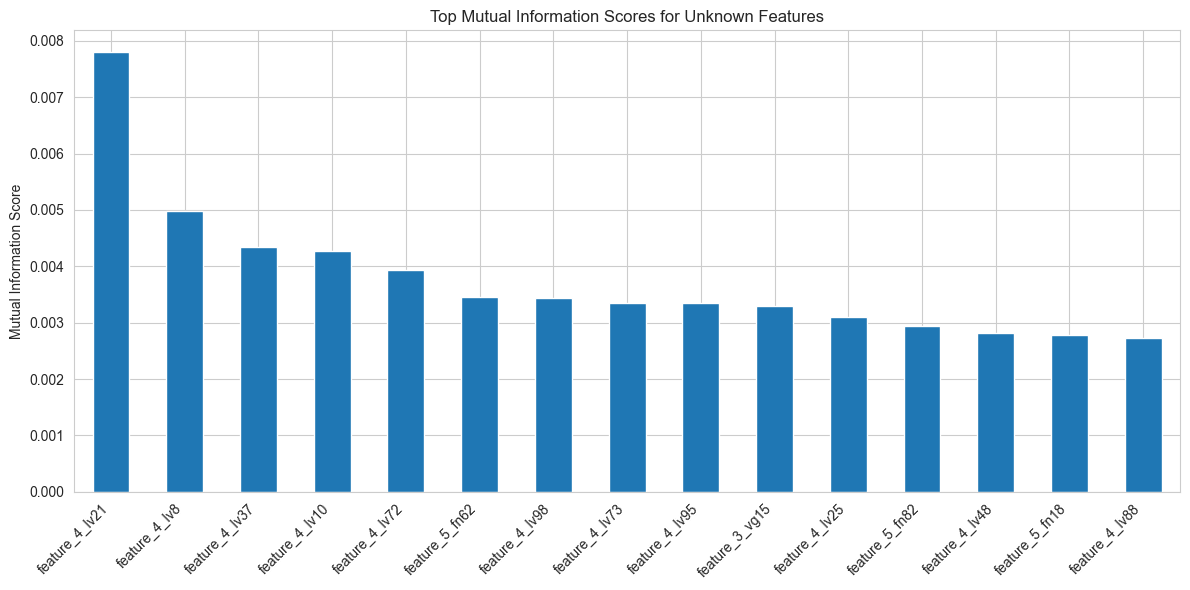

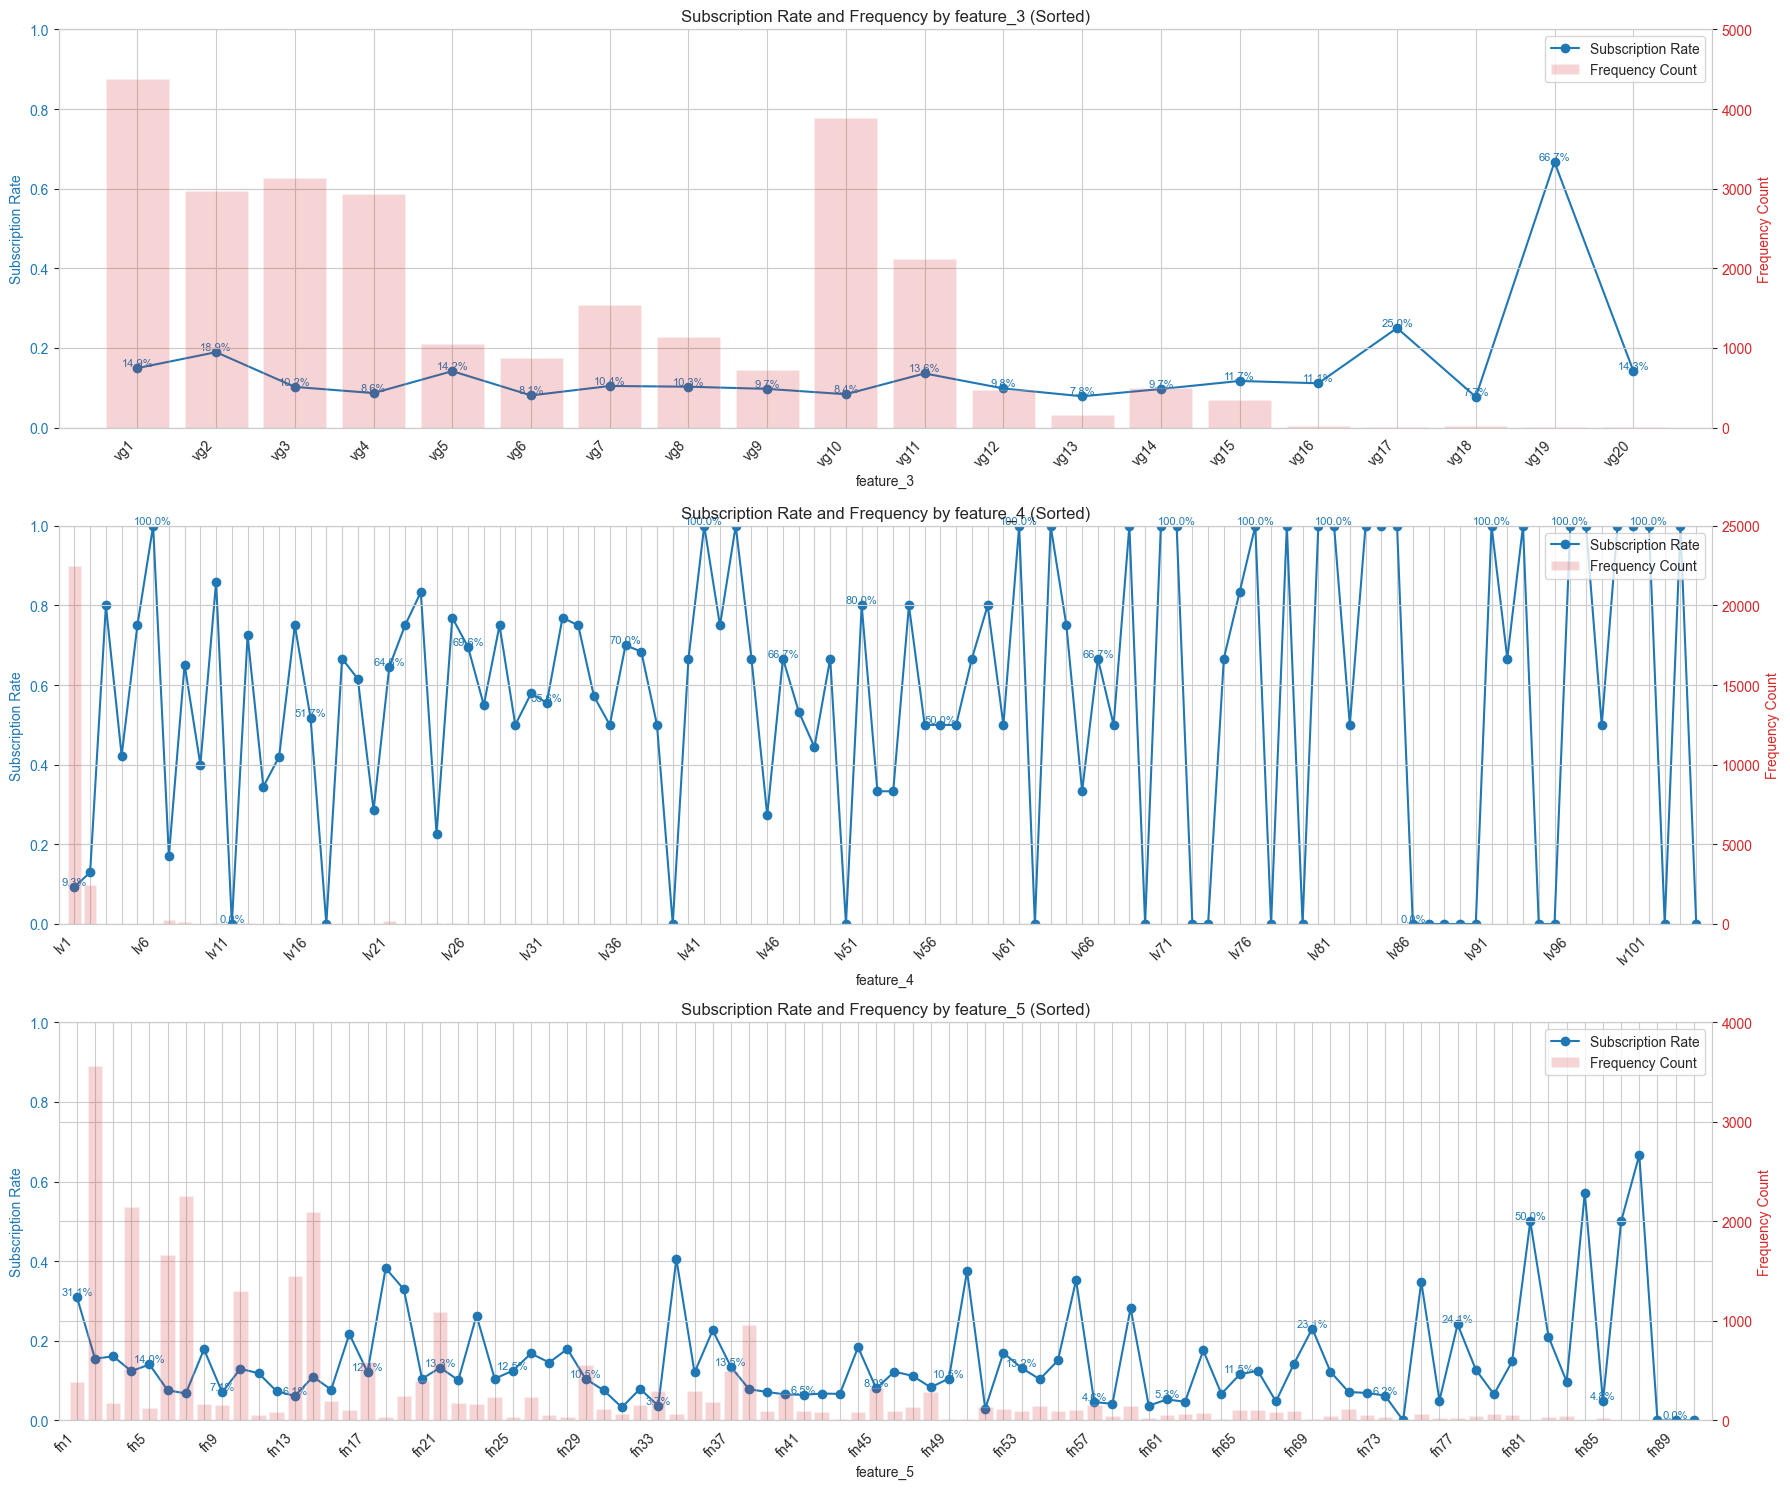

In [14]:
# Analysis of relationship between unknown features and target variable y
print("\n=== RELATIONSHIP BETWEEN UNKNOWN FEATURES AND TARGET VARIABLE ===\n")

# 1. Calculate subscription rates by category for each unknown feature
print("Subscription rates by category:")
unknown_features = ['feature_3', 'feature_4', 'feature_5']
topn = 20
for col in unknown_features:
    if col in train_df.columns:
        print(f"\n{col} subscription rates:")
        # Calculate subscription rate by category
        sub_rates = train_df.groupby(col)['y_encoded'].mean().sort_values(ascending=False)
        print(sub_rates.head(topn).round(4))  # Show top (topn) categories with highest subscription rates

        # Calculate statistical significance using chi-square test
        from scipy.stats import chi2_contingency
        cross_tab = pd.crosstab(train_df[col], train_df['y'])
        chi2, p_value, dof, expected = chi2_contingency(cross_tab)
        print(f"\n{col} Chi-square test results:")
        print(f"  Chi-square statistic: {chi2:.4f}")
        print(f"  p-value: {p_value:.6f}")
        print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")

# 2. Plot subscription rates for top categories
plt.figure(figsize=(18, 15))
for i, col in enumerate(unknown_features):
    if col in train_df.columns:
        # Get subscription rates by category
        sub_rates = train_df.groupby(col)['y_encoded'].mean().sort_values(ascending=False)

        # Plot top topn categories
        plt.subplot(3, 1, i+1)
        top_rates = sub_rates.head(topn)
        plt.bar(top_rates.index.astype(str), top_rates.values)
        plt.title(f'Subscription Rates by {col} (Top {topn} Categories)')
        plt.xlabel(col)
        plt.ylabel('Subscription Rate')
        plt.xticks(rotation=45, ha='right')

        # Add percentage labels on top of bars
        for j, v in enumerate(top_rates.values):
            plt.text(j, v + 0.01, f'{v:.1%}', ha='center')

plt.tight_layout()
plt.show()

# 3. Plot stacked bar charts to show distribution of subscription vs non-subscription
plt.figure(figsize=(18, 15))
for i, col in enumerate(unknown_features):
    if col in train_df.columns:
        plt.subplot(3, 1, i+1)
        # Get top topn categories by frequency
        top_cats = train_df[col].value_counts().head(topn).index
        # Filter data to only include top categories
        filtered_data = train_df[train_df[col].isin(top_cats)]
        # Create cross tab
        cross_tab = pd.crosstab(filtered_data[col], filtered_data['y'])
        # Plot stacked bar
        cross_tab.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title(f'{col} Distribution by Subscription Status (Top {topn} Categories)')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Subscription')

plt.tight_layout()
plt.show()

# 4. Feature importance analysis using mutual information
print("\n=== FEATURE IMPORTANCE ANALYSIS ===\n")
from sklearn.feature_selection import mutual_info_classif

# Prepare data for mutual information calculation
unknown_features_present = [col for col in unknown_features if col in train_df.columns]
X_unknown = pd.get_dummies(train_df[unknown_features_present], drop_first=True)

# Calculate mutual information
mi_scores = mutual_info_classif(X_unknown, train_df['y_encoded'])
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_unknown.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print("Top mutual information scores for unknown features (first 20):")
print(mi_scores.head(20))

# Plot mutual information scores for top features
plt.figure(figsize=(12, 6))
top_mi = mi_scores.head(15)
top_mi.plot(kind='bar')
plt.title('Top Mutual Information Scores for Unknown Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot subscription rates and frequency distributions for unknown features with proper sorting
import math
plt.figure(figsize=(18, 15))

# Normalize category names for proper sorting (e.g., vg2 becomes vg02)
def normalize_category_name(category: str) -> str:
    import re
    # Split string into text and numeric parts
    parts = re.split(r'(\d+)', str(category))
    # Pad numeric parts with leading zeros to ensure proper ordering
    for i in range(len(parts)):
        if parts[i].isdigit():
            # Apply padding to numeric parts up to 3 digits
            if len(parts[i]) <= 3:
                parts[i] = parts[i].zfill(3)
    # Reassemble the normalized category name
    return ''.join(parts)

for i, col in enumerate(unknown_features):
    if col in train_df.columns:
        plt.subplot(3, 1, i+1)

        # Calculate subscription rates by category
        sub_rates = train_df.groupby(col)['y_encoded'].mean()
        # Get value counts (frequencies) by category
        value_counts = train_df[col].value_counts()

        # Get all categories and normalize their names for sorting
        categories = list(sub_rates.index)
        normalized_cats = {cat: normalize_category_name(cat) for cat in categories}

        # Sort categories by their normalized names
        sorted_cats = sorted(categories, key=lambda x: normalized_cats[x])

        # Prepare sorted data for plotting
        sorted_rates = [sub_rates[cat] for cat in sorted_cats]
        sorted_counts = [value_counts[cat] for cat in sorted_cats]

        # Set up primary axis for subscription rates (line plot)
        ax1 = plt.gca()
        line_plot = ax1.plot(range(len(sorted_cats)), sorted_rates, 'o-', color='tab:blue', label='Subscription Rate')
        ax1.set_xlabel(col)
        ax1.set_ylabel('Subscription Rate', color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')
        ax1.set_ylim(0, 1)

        # Set up secondary axis for frequency counts (bar plot)
        ax2 = ax1.twinx()
        bar_plot = ax2.bar(range(len(sorted_cats)), sorted_counts, alpha=0.2, color='tab:red', label='Frequency Count')
        ax2.set_ylabel('Frequency Count', color='tab:red')
        ax2.tick_params(axis='y', labelcolor='tab:red')

        # Set secondary y-axis limits and ticks to match primary axis style (6 horizontal lines)
        max_count = max(sorted_counts)
        # Choose appropriate tick interval: 1000, 2000, or 5000
        if max_count <= 5000:
            interval = 1000
        elif max_count <= 10000:
            interval = 2000
        else:
            interval = 5000

        # Set y-axis limits with appropriate interval to ensure 6 horizontal lines
        ax2.set_ylim(0, math.ceil(max_count / interval) * interval)
        ax2.set_yticks(range(0, math.ceil(max_count / interval) * interval + 1, interval))

        # Configure x-axis ticks with original category names
        ax1.set_xticks(range(len(sorted_cats)))
        # Reduce number of tick labels to avoid overcrowding
        n = max(1, len(sorted_cats) // 20)  # Dynamic reduction based on category count
        for j, tick in enumerate(ax1.xaxis.get_majorticklabels()):
            if j % n != 0:
                tick.set_visible(False)
        ax1.set_xticklabels(sorted_cats, rotation=45, ha='right')

        # Set x-axis limits with one unit padding on both sides
        if len(sorted_cats) > 0:
            ax1.set_xlim(-1, len(sorted_cats))

        # Combine legends from both axes
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

        plt.title(f'Subscription Rate and Frequency by {col} (Sorted)')

        # Add percentage labels to line plot points for visible ticks
        for j, v in enumerate(sorted_rates):
            if j % n == 0:  # Only label visible ticks
                ax1.text(j, v + 0.005, f'{v:.1%}', ha='center', fontsize=8, color='tab:blue')

plt.tight_layout()
plt.show()

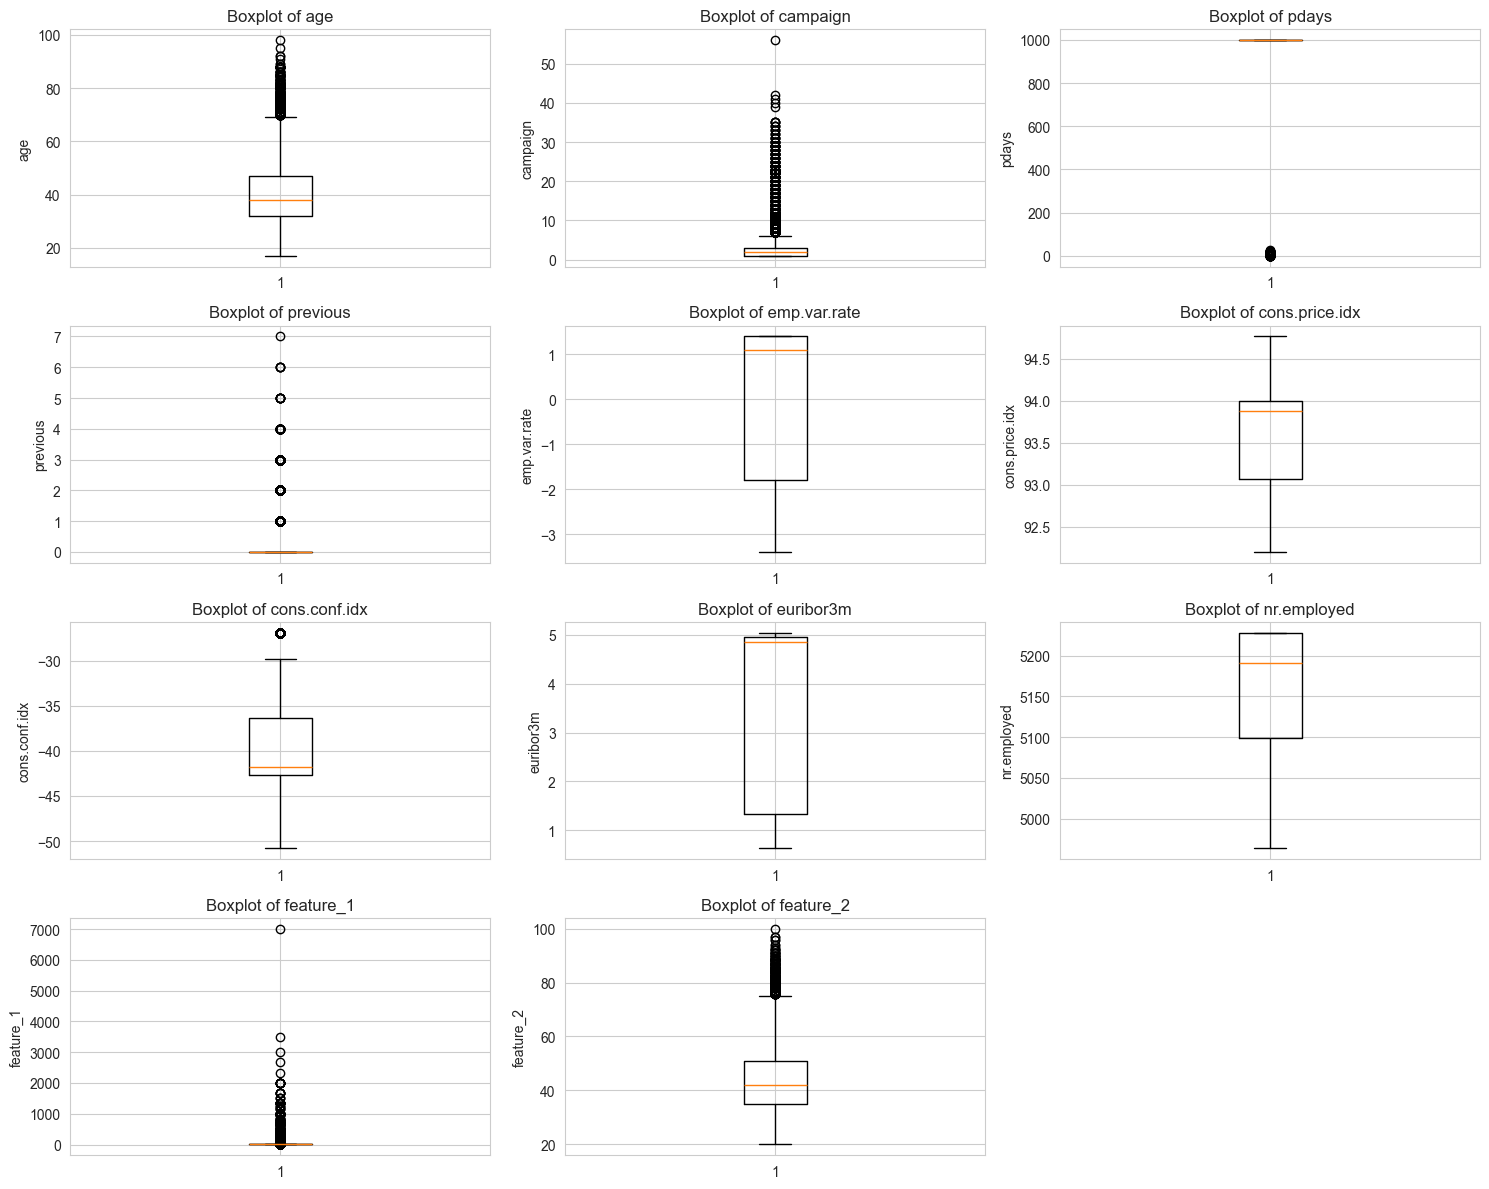

In [15]:
# Boxplots for numerical features to detect outliers - Fixed version
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_features):
    # Check for infinite values and replace with NaN
    data = train_df[col].copy()
    if np.any(np.isinf(data)):
        data = data.replace([np.inf, -np.inf], np.nan)

    # Remove NaN values for plotting
    plot_data = data.dropna()

    if len(plot_data) > 0:
        axes[i].boxplot(plot_data)
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel(col)
    else:
        axes[i].text(0.5, 0.5, f'No valid data for {col}',
                    horizontalalignment='center', verticalalignment='center',
                    transform=axes[i].transAxes)
        axes[i].set_title(f'Boxplot of {col}')

# Hide empty subplots
for i in range(len(numerical_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [16]:
# Categorical features analysis
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'day_of_week', 'poutcome', 'feature_3',
                       'feature_4', 'feature_5']

print("Unique values in categorical features:")
for col in categorical_features:
    if col in train_df.columns:
        print(f"{col}: {train_df[col].nunique()} unique values")

Unique values in categorical features:
job: 12 unique values
marital: 4 unique values
education: 8 unique values
default: 3 unique values
housing: 3 unique values
loan: 3 unique values
contact: 2 unique values
month: 10 unique values
day_of_week: 5 unique values
poutcome: 3 unique values
feature_3: 20 unique values
feature_4: 104 unique values
feature_5: 90 unique values



=== DETAILED ANALYSIS FOR UNKNOWN FEATURES ===

Missing values analysis:
feature_3: 0 missing values (0.00%)
feature_4: 0 missing values (0.00%)
feature_5: 0 missing values (0.00%)

Category distribution analysis:

feature_3 value counts:
feature_3
vg1     4382
vg10    3888
vg3     3136
vg2     2974
vg4     2937
vg11    2112
vg7     1533
vg8     1141
vg5     1045
vg6      868
Name: count, dtype: int64

feature_3 top 10 categories by percentage:
feature_3
vg1     16.70
vg10    14.81
vg3     11.95
vg2     11.33
vg4     11.19
vg11     8.05
vg7      5.84
vg8      4.35
vg5      3.98
vg6      3.31
Name: count, dtype: float64
Number of rare categories (<1%): 6

feature_4 value counts:
feature_4
lv1     22493
lv2      2431
lv7       241
lv21      178
lv8       152
lv12       80
lv10       71
lv14       50
lv25       39
lv24       31
Name: count, dtype: int64

feature_4 top 10 categories by percentage:
feature_4
lv1     85.70
lv2      9.26
lv7      0.92
lv21     0.68
lv8      0.58
lv12     0.3

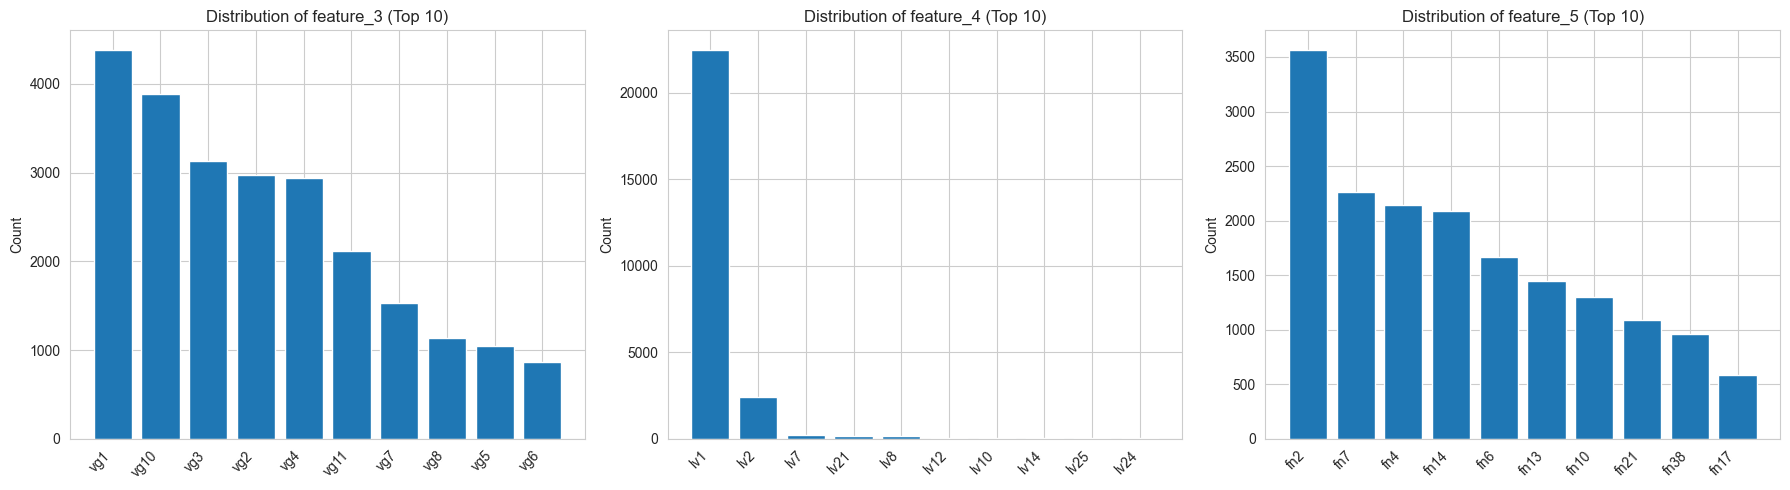

In [17]:
# Detailed analysis for unknown features (feature_3, feature_4, feature_5)
unknown_features = ['feature_3', 'feature_4', 'feature_5']

print("\n=== DETAILED ANALYSIS FOR UNKNOWN FEATURES ===\n")

# 1. Missing values analysis
print("Missing values analysis:")
for col in unknown_features:
    if col in train_df.columns:
        missing_count = train_df[col].isnull().sum()
        missing_percent = missing_count / len(train_df) * 100
        print(f"{col}: {missing_count} missing values ({missing_percent:.2f}%)")

# 2. Category distribution analysis
print("\nCategory distribution analysis:")
for col in unknown_features:
    if col in train_df.columns:
        print(f"\n{col} value counts:")
        value_counts = train_df[col].value_counts()
        # Print top 10 categories to avoid overwhelming output
        print(value_counts.head(10))

        # Calculate percentage distribution
        value_percents = value_counts / len(train_df) * 100
        print(f"\n{col} top 10 categories by percentage:")
        print(value_percents.head(10).round(2))

        # Check for rare categories (less than 1%)
        rare_cats = value_percents[value_percents < 1].count()
        print(f"Number of rare categories (<1%): {rare_cats}")

# 3. Check for 'unknown' or special values
print("\nCheck for 'unknown' or special values:")
special_values = ['unknown', 'NA', 'N/A', 'missing']
for col in unknown_features:
    if col in train_df.columns:
        for special in special_values:
            special_count = (train_df[col] == special).sum()
            if special_count > 0:
                print(f"{col}: {special_count} '{special}' values")

        # Check for empty strings
        empty_count = (train_df[col] == '').sum()
        if empty_count > 0:
            print(f"{col}: {empty_count} empty string values")

# 4. Plot distributions for unknown features
plt.figure(figsize=(18, 5))
for i, col in enumerate(unknown_features):
    if col in train_df.columns:
        plt.subplot(1, 3, i+1)
        # Get top 10 categories for plotting to make it readable
        top_cats = train_df[col].value_counts().head(10)
        plt.bar(top_cats.index.astype(str), top_cats.values)
        plt.title(f'Distribution of {col} (Top 10)')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Count')

plt.tight_layout()
plt.show()

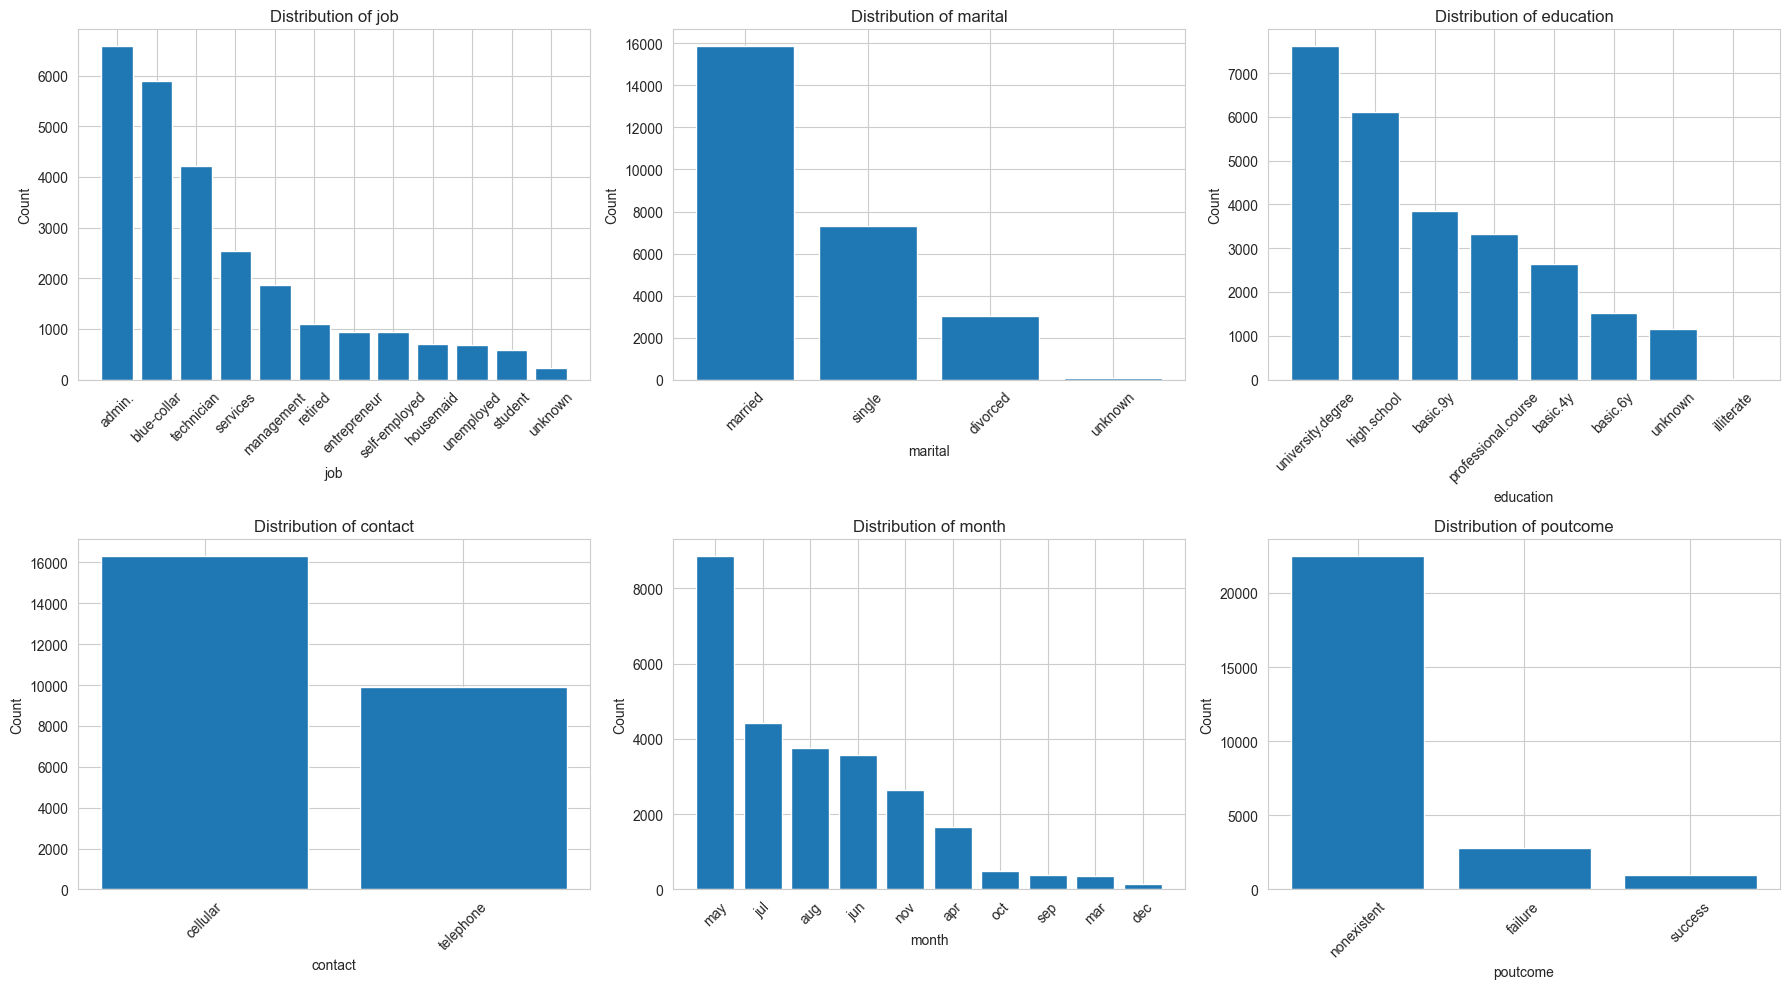

In [18]:
# Plot distribution of main categorical features
main_categorical = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(main_categorical):
    if col in train_df.columns:
        value_counts = train_df[col].value_counts()
        axes[i].bar(range(len(value_counts)), value_counts.values)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45)

plt.tight_layout()
plt.show()

In [19]:
# Check for 'unknown' values in categorical features
print("'unknown' values in categorical features:")
for col in categorical_features:
    if col in train_df.columns:
        unknown_count = (train_df[col] == 'unknown').sum()
        if unknown_count > 0:
            print(f"{col}: {unknown_count} unknown values ({unknown_count/len(train_df)*100:.2f}%)")

'unknown' values in categorical features:
job: 224 unknown values (0.85%)
marital: 49 unknown values (0.19%)
education: 1154 unknown values (4.40%)
default: 5552 unknown values (21.15%)
housing: 650 unknown values (2.48%)
loan: 650 unknown values (2.48%)


pdays value distribution:
pdays
999    25206
3        310
6        288
4         84
12        41
Name: count, dtype: int64


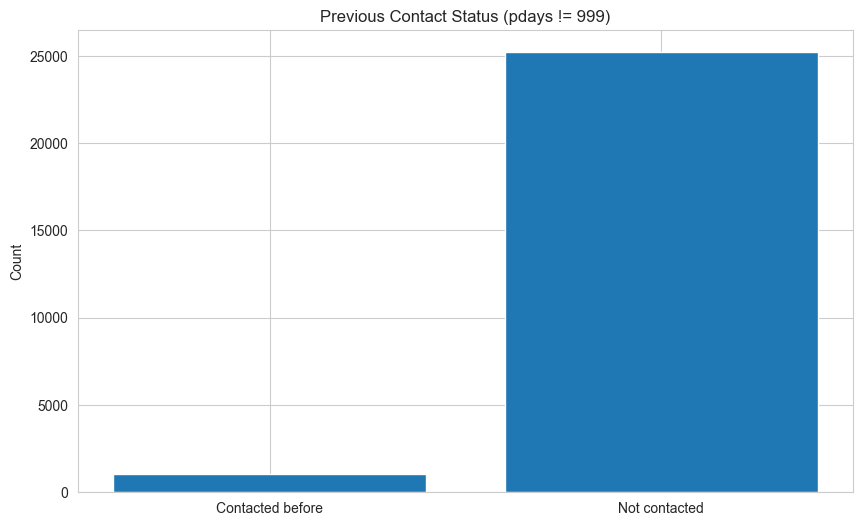

Previously contacted: 1040 (3.96%)
Not contacted before: 25206 (96.04%)


In [20]:
# Analyze pdays feature (999 means not contacted)
print("pdays value distribution:")
pdays_counts = train_df['pdays'].value_counts().head()
print(pdays_counts)

plt.figure(figsize=(10, 6))
contacted = (train_df['pdays'] != 999).sum()
not_contacted = (train_df['pdays'] == 999).sum()

plt.bar(['Contacted before', 'Not contacted'], [contacted, not_contacted])
plt.title('Previous Contact Status (pdays != 999)')
plt.ylabel('Count')
plt.show()

print(f"Previously contacted: {contacted} ({contacted/len(train_df)*100:.2f}%)")
print(f"Not contacted before: {not_contacted} ({not_contacted/len(train_df)*100:.2f}%)")

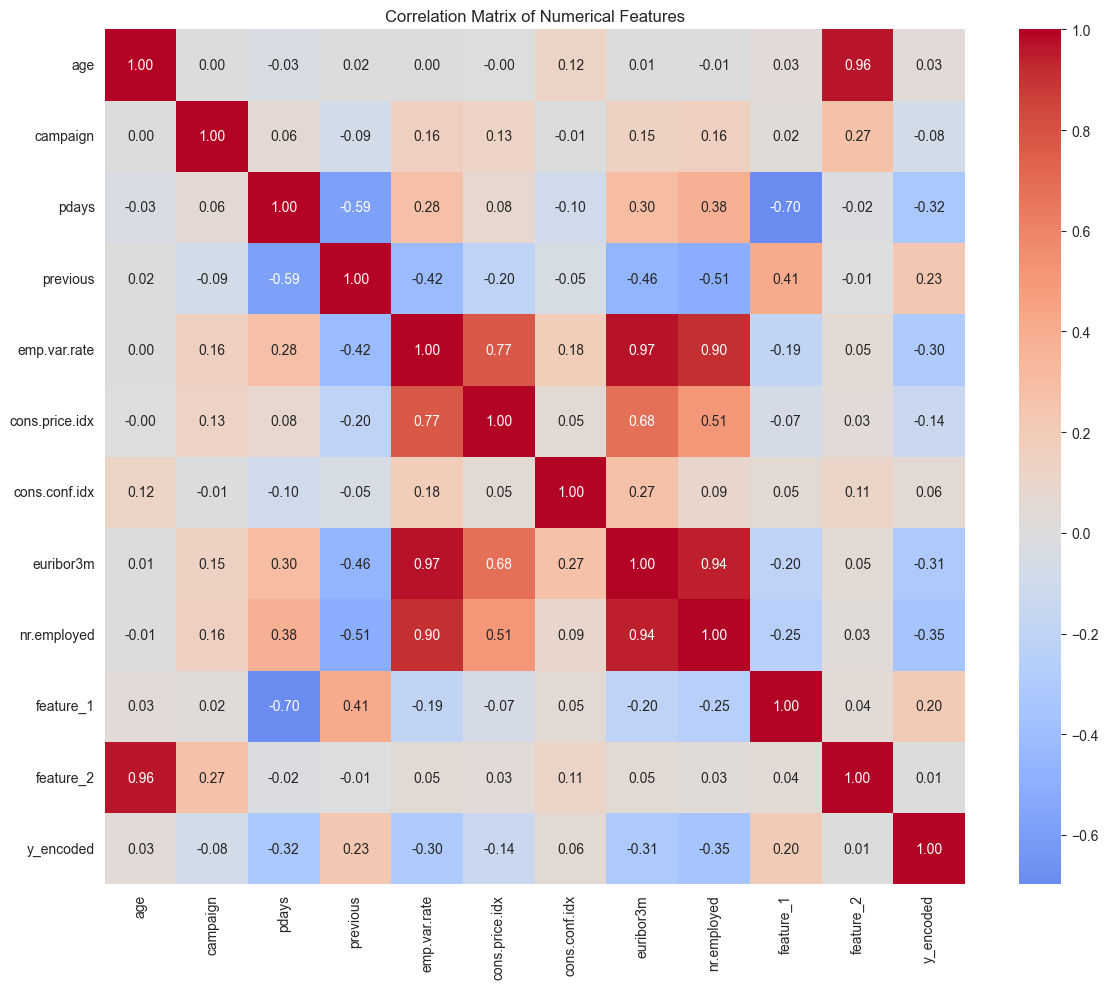

Top correlations with target variable:
nr.employed       0.354162
pdays             0.321800
euribor3m         0.308413
emp.var.rate      0.299736
previous          0.230267
feature_1         0.197704
cons.price.idx    0.138103
campaign          0.076558
cons.conf.idx     0.056809
age               0.032929
Name: y_encoded, dtype: float64


In [21]:
# Correlation analysis for numerical features - Fixed version
# Prepare data for correlation matrix (handle infinite values)
corr_data = train_df[numerical_features + ['y_encoded']].copy()

# Replace infinite values with NaN for correlation calculation
for col in corr_data.columns:
    if np.any(np.isinf(corr_data[col])):
        corr_data[col] = corr_data[col].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN for correlation calculation
corr_data_clean = corr_data.dropna()

if len(corr_data_clean) > 0:
    correlation_matrix = corr_data_clean.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()

    # Top correlations with target variable
    target_correlations = correlation_matrix['y_encoded'].abs().sort_values(ascending=False)
    print("Top correlations with target variable:")
    print(target_correlations[1:11])  # Exclude self-correlation
else:
    print("Not enough valid data for correlation analysis")

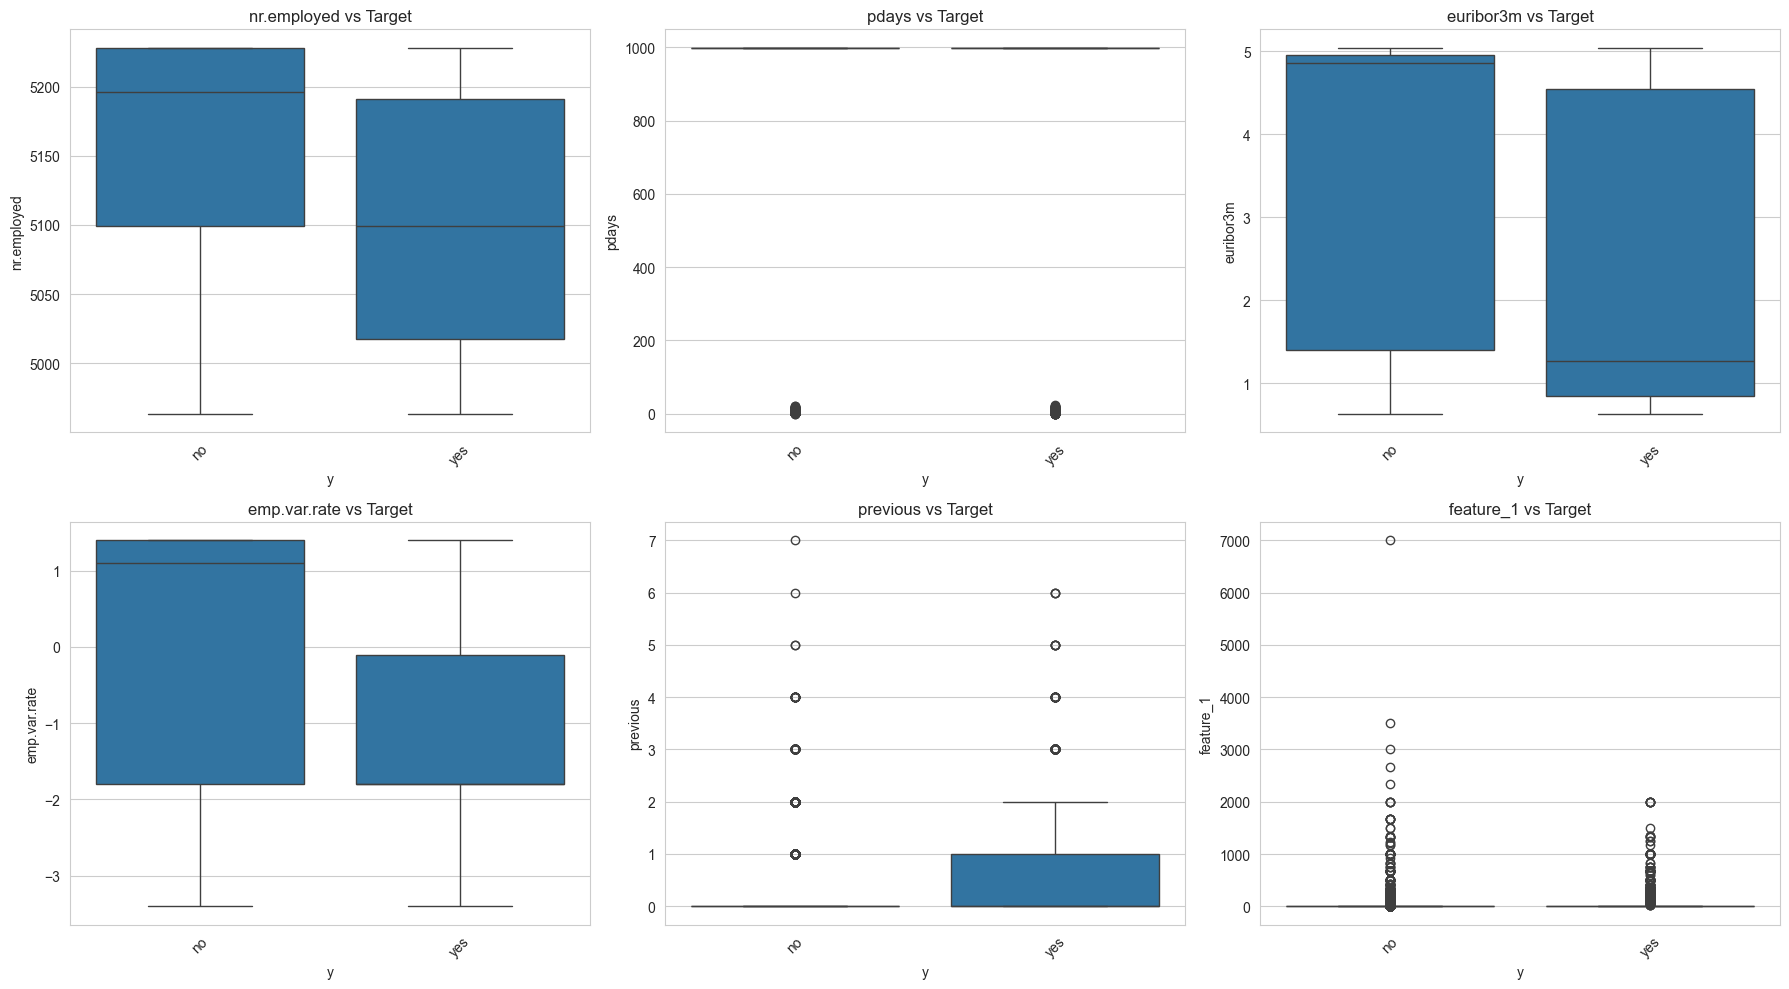

In [22]:
# Analyze relationship between target and key numerical features
if 'target_correlations' in locals():
    key_features = target_correlations.index[1:7]  # Top 6 features excluding target itself

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()

    for i, feature in enumerate(key_features):
        if feature != 'y_encoded' and feature in train_df.columns:
            # Handle infinite values for plotting
            plot_data = train_df[[feature, 'y']].copy()
            if np.any(np.isinf(plot_data[feature])):
                plot_data[feature] = plot_data[feature].replace([np.inf, -np.inf], np.nan)
            plot_data = plot_data.dropna()

            if len(plot_data) > 0:
                sns.boxplot(data=plot_data, x='y', y=feature, ax=axes[i])
                axes[i].set_title(f'{feature} vs Target')
                axes[i].tick_params(axis='x', rotation=45)
            else:
                axes[i].text(0.5, 0.5, f'No valid data for {feature}',
                            horizontalalignment='center', verticalalignment='center',
                            transform=axes[i].transAxes)
                axes[i].set_title(f'{feature} vs Target')

    plt.tight_layout()
    plt.show()

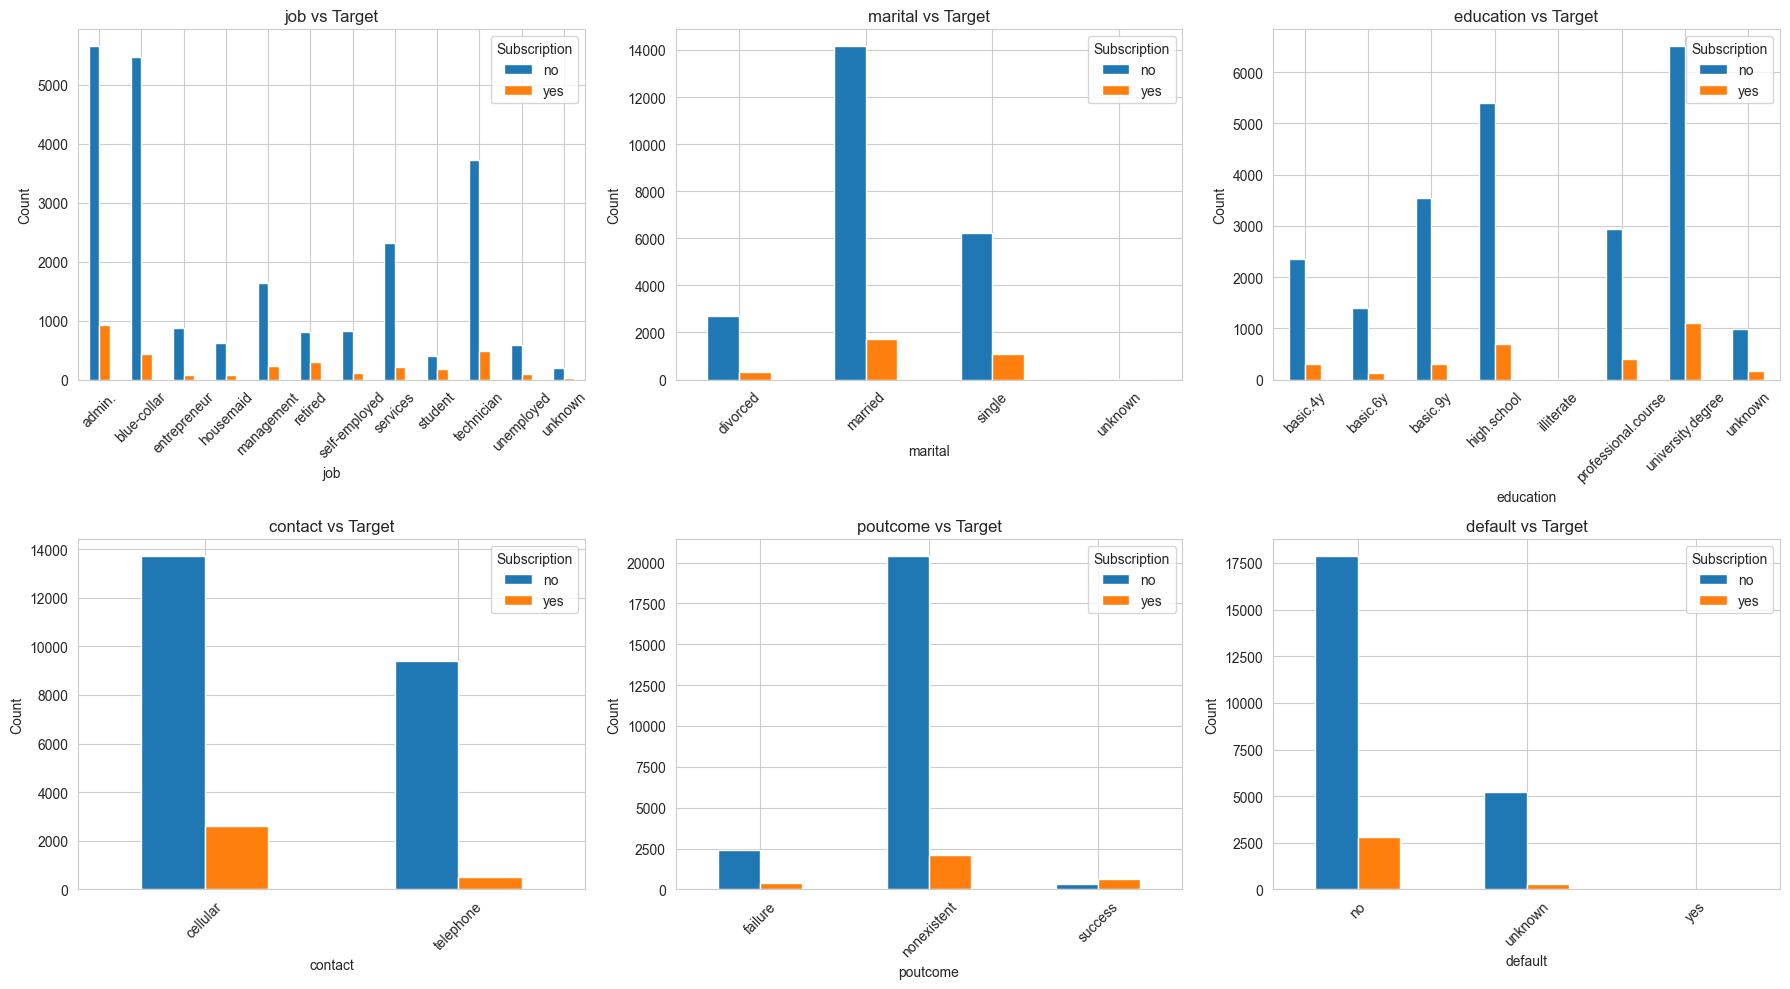

In [23]:
# Analyze relationship between target and categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

categorical_target = ['job', 'marital', 'education', 'contact', 'poutcome', 'default']

for i, col in enumerate(categorical_target):
    if col in train_df.columns:
        cross_tab = pd.crosstab(train_df[col], train_df['y'])
        cross_tab.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{col} vs Target')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].legend(title='Subscription')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

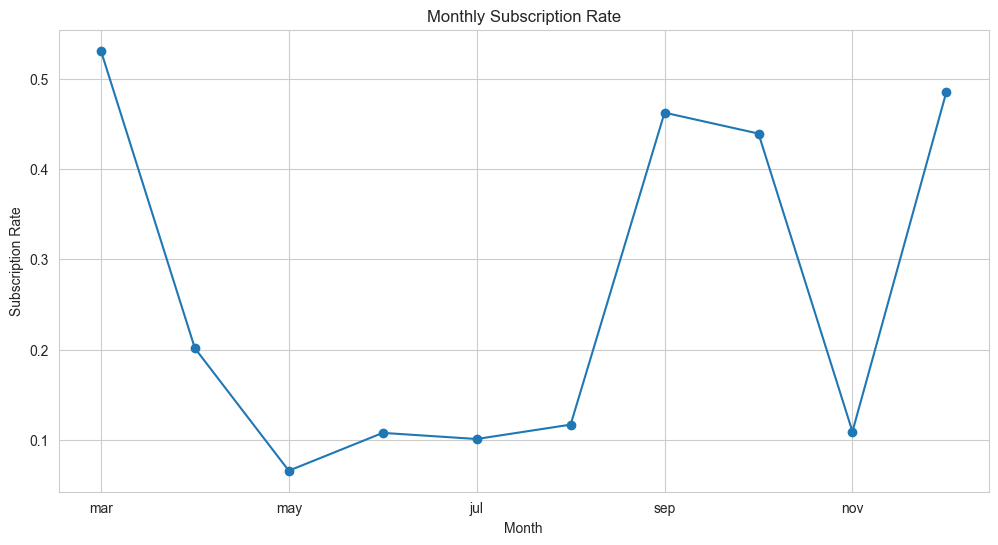

In [24]:
# Monthly trend analysis
if 'month' in train_df.columns:
    month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    train_df['month'] = pd.Categorical(train_df['month'], categories=month_order, ordered=True)

    monthly_data = train_df.groupby('month')['y_encoded'].mean()

    plt.figure(figsize=(12, 6))
    monthly_data.plot(kind='line', marker='o')
    plt.title('Monthly Subscription Rate')
    plt.xlabel('Month')
    plt.ylabel('Subscription Rate')
    plt.grid(True)
    plt.show()

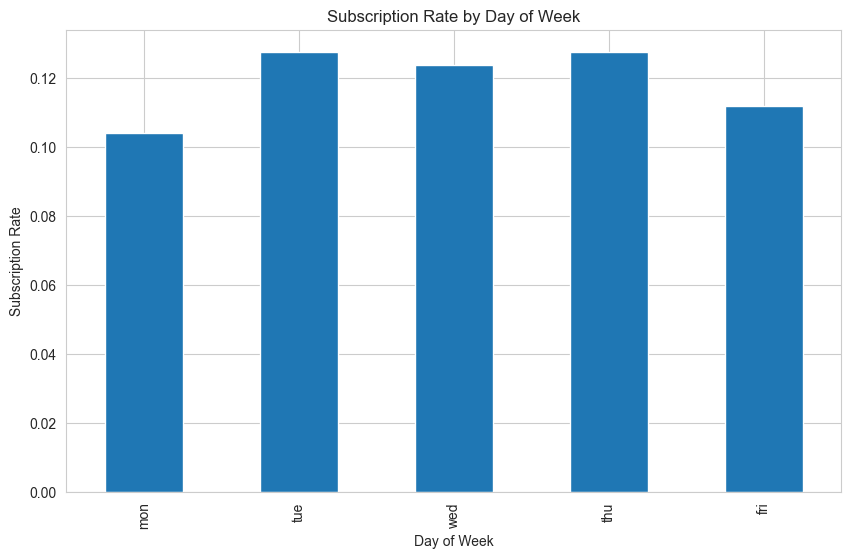

In [25]:
# Day of week analysis
if 'day_of_week' in train_df.columns:
    day_order = ['mon', 'tue', 'wed', 'thu', 'fri']
    train_df['day_of_week'] = pd.Categorical(train_df['day_of_week'], categories=day_order, ordered=True)

    daily_data = train_df.groupby('day_of_week')['y_encoded'].mean()

    plt.figure(figsize=(10, 6))
    daily_data.plot(kind='bar')
    plt.title('Subscription Rate by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Subscription Rate')
    plt.show()

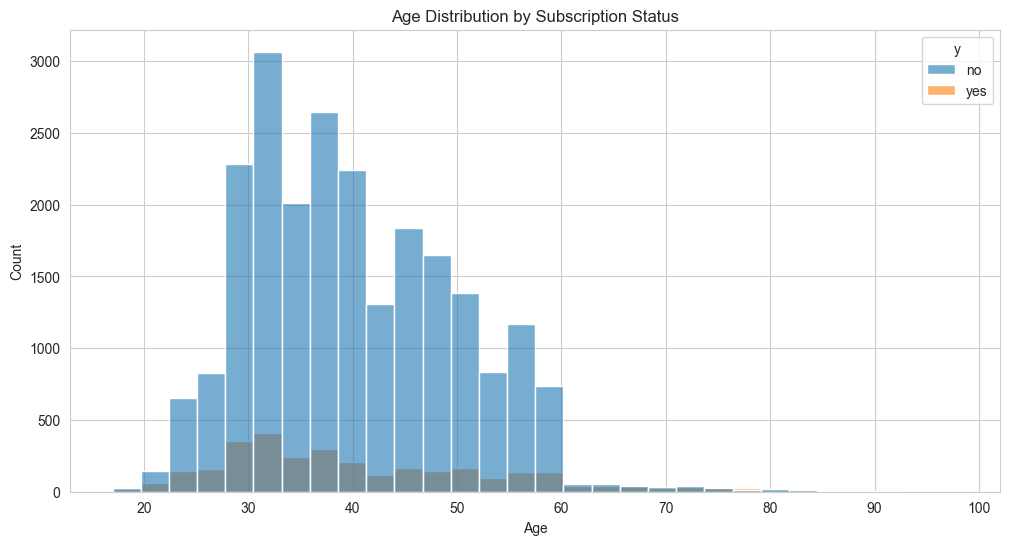

In [26]:
# Age analysis with target
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='age', hue='y', bins=30, alpha=0.6)
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

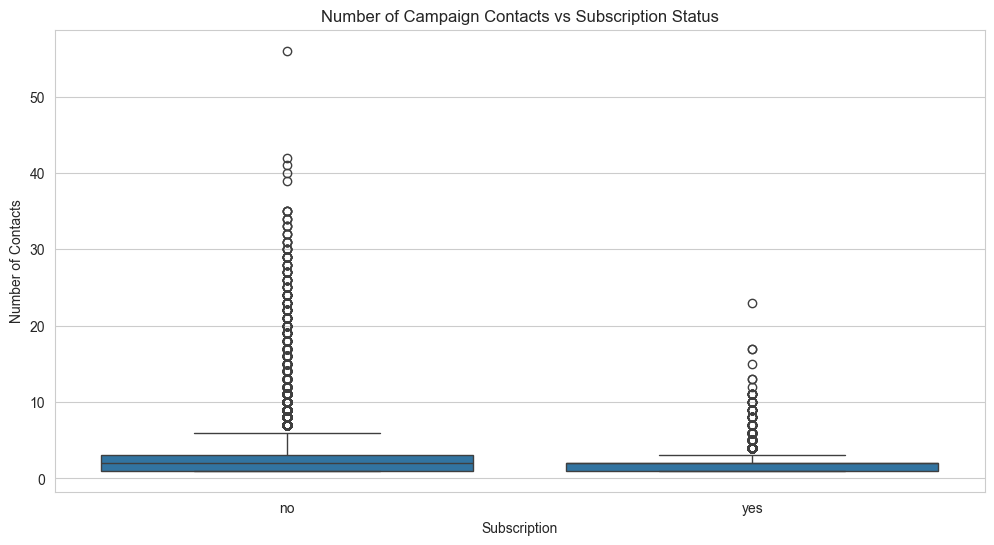

In [27]:
# Campaign contacts analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='y', y='campaign')
plt.title('Number of Campaign Contacts vs Subscription Status')
plt.xlabel('Subscription')
plt.ylabel('Number of Contacts')
plt.show()

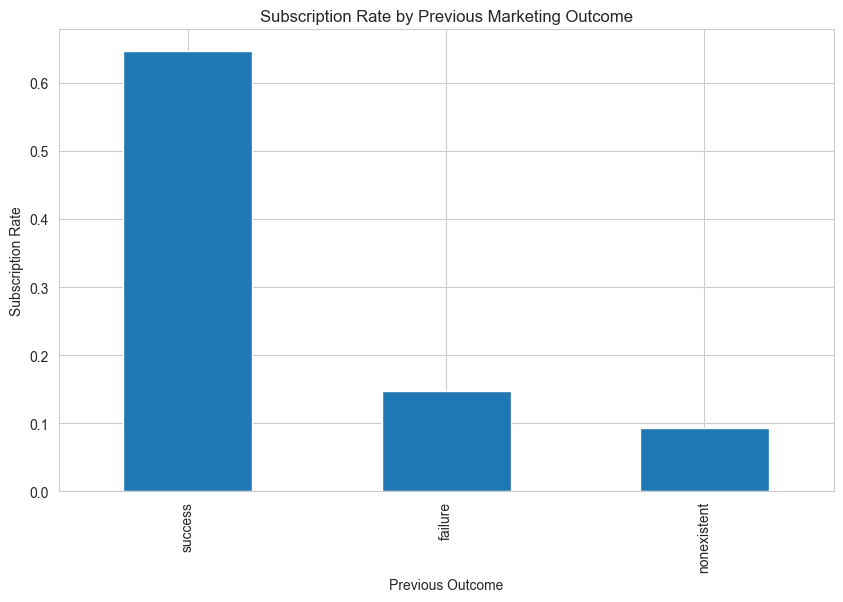

In [28]:
# Previous marketing outcome analysis
if 'poutcome' in train_df.columns:
    poutcome_rates = train_df.groupby('poutcome')['y_encoded'].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    poutcome_rates.plot(kind='bar')
    plt.title('Subscription Rate by Previous Marketing Outcome')
    plt.xlabel('Previous Outcome')
    plt.ylabel('Subscription Rate')
    plt.show()

In [29]:
# Feature engineering suggestions based on analysis
print("=== FEATURE ENGINEERING SUGGESTIONS ===")
print("1. Handle 'unknown' values in categorical features")
print("2. Create binary feature from pdays: 'previously_contacted'")
print("3. Bin age into categories (young, middle-aged, senior)")
print("4. Transform skewed numerical features (campaign, previous)")
print("5. Create interaction features (job × education, marital × loan)")
print("6. Encode months with seasonal information")
print("7. Handle high cardinality features with target encoding")

=== FEATURE ENGINEERING SUGGESTIONS ===
1. Handle 'unknown' values in categorical features
2. Create binary feature from pdays: 'previously_contacted'
3. Bin age into categories (young, middle-aged, senior)
4. Transform skewed numerical features (campaign, previous)
5. Create interaction features (job × education, marital × loan)
6. Encode months with seasonal information
7. Handle high cardinality features with target encoding


In [30]:
# Data quality summary
print("=== DATA QUALITY SUMMARY ===")
print(f"Training set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")
print(f"Target distribution: {dict(train_df['y'].value_counts())}")
print(f"Missing values: {train_df.isnull().sum().sum()}")
print(f"Duplicate rows: {train_df.duplicated().sum()}")

=== DATA QUALITY SUMMARY ===
Training set size: (26246, 26)
Test set size: (8000, 24)
Target distribution: {'no': np.int64(23124), 'yes': np.int64(3122)}
Missing values: 0
Duplicate rows: 0


In [31]:
# Save cleaned dataset for modeling
print("Saving processed data...")
train_df_cleaned = train_df.copy()
test_df_cleaned = test_df.copy()

# Basic cleaning: remove duplicates if any
train_df_cleaned = train_df_cleaned.drop_duplicates()
test_df_cleaned = test_df_cleaned.drop_duplicates()

print(f"Cleaned training set: {train_df_cleaned.shape}")
print(f"Cleaned test set: {test_df_cleaned.shape}")

Saving processed data...
Cleaned training set: (26246, 26)
Cleaned test set: (7991, 24)


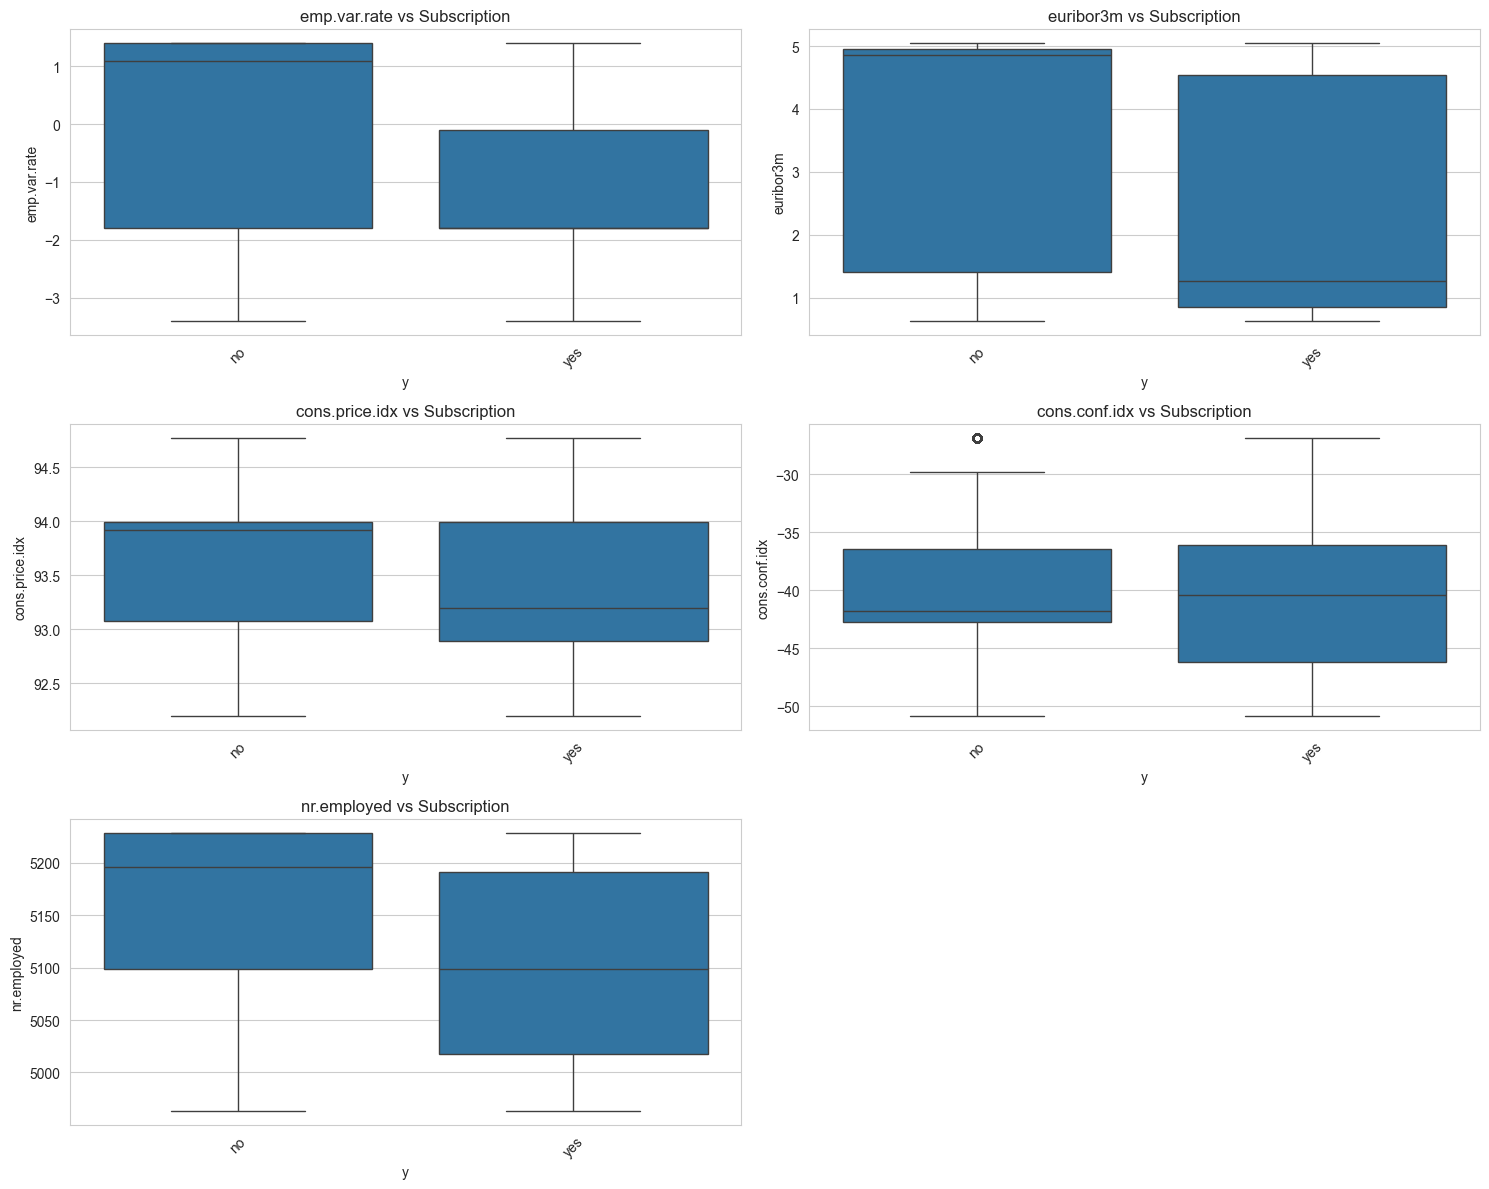

In [32]:
# Additional analysis: Economic indicators over time
economic_features = ['emp.var.rate', 'euribor3m', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(economic_features):
    if i < len(economic_features) and feature in train_df.columns:
        # Handle infinite values
        plot_data = train_df[[feature, 'y']].copy()
        if np.any(np.isinf(plot_data[feature])):
            plot_data[feature] = plot_data[feature].replace([np.inf, -np.inf], np.nan)
        plot_data = plot_data.dropna()

        if len(plot_data) > 0:
            sns.boxplot(data=plot_data, x='y', y=feature, ax=axes[i])
            axes[i].set_title(f'{feature} vs Subscription')
            axes[i].tick_params(axis='x', rotation=45)
        else:
            axes[i].text(0.5, 0.5, f'No valid data for {feature}',
                        horizontalalignment='center', verticalalignment='center',
                        transform=axes[i].transAxes)
            axes[i].set_title(f'{feature} vs Subscription')

# Hide empty subplot
if len(economic_features) < len(axes):
    for i in range(len(economic_features), len(axes)):
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [33]:
# Final insights and recommendations based on actual analysis results
print("=== KEY INSIGHTS AND RECOMMENDATIONS ===")

# 1. Data imbalance analysis
target_ratio = train_df['y'].value_counts(normalize=True)
minority_class_ratio = target_ratio.min()
if minority_class_ratio < 0.3:
    print(f"1. DATA IMBALANCE: Target variable is highly imbalanced (minority class: {minority_class_ratio:.1%})")
else:
    print(f"1. DATA BALANCE: Target variable is reasonably balanced")

# 2. Feature importance based on correlation
if 'target_correlations' in locals():
    top_corr_features = target_correlations.index[1:4]  # Top 3 correlated features
    print(f"2. IMPORTANT FEATURES: {', '.join(top_corr_features)} show highest correlation with target")
else:
    print("2. FEATURE CORRELATION: Check correlation analysis for important features")

# 3. Temporal patterns
if 'monthly_data' in locals() and len(monthly_data) > 0:
    monthly_variation = monthly_data.max() - monthly_data.min()
    if monthly_variation > 0.1:
        print("3. TEMPORAL PATTERNS: Strong monthly patterns in subscription rates")
    else:
        print("3. TEMPORAL PATTERNS: Moderate monthly variation in subscription rates")

# 4. Previous contacts analysis
if 'contacted' in locals() and 'not_contacted' in locals():
    contacted_ratio = contacted / (contacted + not_contacted)
    if contacted_ratio < 0.3:
        print(f"4. PREVIOUS CONTACTS: Most clients ({not_contacted/len(train_df)*100:.1f}%) were not contacted before")
    else:
        print(f"4. PREVIOUS CONTACTS: {contacted_ratio:.1%} of clients were previously contacted")

# 5. Data quality issues
data_quality_issues = []

# Check for missing values
missing_total = train_df.isnull().sum().sum()
if missing_total > 0:
    data_quality_issues.append(f"{missing_total} missing values")

# Check for duplicates
duplicate_count = train_df.duplicated().sum()
if duplicate_count > 0:
    data_quality_issues.append(f"{duplicate_count} duplicate rows")

# Check for infinite values
inf_count = 0
for col in numerical_features:
    if col in train_df.columns:
        inf_count += np.isinf(train_df[col]).sum()
if inf_count > 0:
    data_quality_issues.append(f"{inf_count} infinite values")

# Check for unknown categorical values
unknown_total = 0
for col in categorical_features:
    if col in train_df.columns:
        unknown_total += (train_df[col] == 'unknown').sum()
if unknown_total > 0:
    data_quality_issues.append(f"{unknown_total} 'unknown' categorical values")

if data_quality_issues:
    print(f"5. DATA QUALITY ISSUES: {', '.join(data_quality_issues)}")
else:
    print("5. DATA QUALITY: Good data quality with no major issues")

print("\nRECOMMENDATIONS:")

# Dynamic recommendations based on findings
recommendations = []

if minority_class_ratio < 0.3:
    recommendations.append("- Use appropriate techniques for imbalanced data (SMOTE, class weights)")

if 'target_correlations' in locals() and len(target_correlations) > 1:
    recommendations.append("- Focus on highly correlated features in modeling")

if monthly_variation > 0.05:
    recommendations.append("- Consider seasonal patterns in campaign timing")

if unknown_total > 0:
    recommendations.append("- Handle categorical 'unknown' values appropriately")

if inf_count > 0 or missing_total > 0:
    recommendations.append("- Clean infinite and missing values before modeling")

if duplicate_count > 0:
    recommendations.append("- Remove duplicate rows from dataset")

# Add general recommendations that are always relevant
general_recommendations = [
    "- Perform feature engineering based on domain insights",
    "- Use cross-validation to evaluate model performance",
    "- Consider ensemble methods for better generalization"
]

recommendations.extend(general_recommendations)

# Print all recommendations
for i, rec in enumerate(recommendations, 1):
    print(rec)

=== KEY INSIGHTS AND RECOMMENDATIONS ===
1. DATA IMBALANCE: Target variable is highly imbalanced (minority class: 11.9%)
2. IMPORTANT FEATURES: nr.employed, pdays, euribor3m show highest correlation with target
3. TEMPORAL PATTERNS: Strong monthly patterns in subscription rates
4. PREVIOUS CONTACTS: Most clients (96.0%) were not contacted before
5. DATA QUALITY ISSUES: 11 infinite values, 8279 'unknown' categorical values

RECOMMENDATIONS:
- Use appropriate techniques for imbalanced data (SMOTE, class weights)
- Focus on highly correlated features in modeling
- Consider seasonal patterns in campaign timing
- Handle categorical 'unknown' values appropriately
- Clean infinite and missing values before modeling
- Perform feature engineering based on domain insights
- Use cross-validation to evaluate model performance
- Consider ensemble methods for better generalization
